In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime

In [2]:
df_fl=pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\input data to the model\AI_FD_Actual.csv")
df_pl=pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\input data to the model\AI_FD_Published.csv")

In [3]:
# df_fl = df_fl[~df_fl['ACTIVITY TYPE CODE'].isin(['CHECK_IN','CHECK_OUT'])]
df_fl = df_fl[~df_fl['ACTIVITY NAME'].isin(['CheckActivity','CHECK_IN','CHECK_OUT'])]

In [4]:
df_fl[df_fl['ACTIVITY TYPE CODE'].isin(['CHECK_IN','CHECK_OUT'])]
# df_fl['ACTIVITY TYPE CODE'].unique()

Empty DataFrame
Columns: [STAFF NUMBER, RANK, HOME BASE, Fleet, ACTIVITY TYPE CODE, FLIGHT NUMBER, DEP AIRPORT CODE, ARR AIRPORT CODE, ACTIVITY START DATE TIME, ACTIVITY END DATE TIME, ACTIVITY NAME]
Index: []

In [5]:
df_fl[df_fl['ACTIVITY NAME'].isin(['CheckActivity'])]

Empty DataFrame
Columns: [STAFF NUMBER, RANK, HOME BASE, Fleet, ACTIVITY TYPE CODE, FLIGHT NUMBER, DEP AIRPORT CODE, ARR AIRPORT CODE, ACTIVITY START DATE TIME, ACTIVITY END DATE TIME, ACTIVITY NAME]
Index: []

In [6]:
df_fl[df_fl['ACTIVITY TYPE CODE'].isna()]

Empty DataFrame
Columns: [STAFF NUMBER, RANK, HOME BASE, Fleet, ACTIVITY TYPE CODE, FLIGHT NUMBER, DEP AIRPORT CODE, ARR AIRPORT CODE, ACTIVITY START DATE TIME, ACTIVITY END DATE TIME, ACTIVITY NAME]
Index: []

In [7]:
df_fl = df_fl.drop(columns=['ACTIVITY NAME'])
df_pl = df_pl.drop(columns=['ACTIVITY NAME'])

In [8]:
import pandas as pd

fleet_mapping = {
    '350': 'A350',
    '787': 'B787',
    '777': 'B777'
}

def normalize_fleet(value):
    # Split by comma and strip spaces
    parts = set(v.strip() for v in value.split(','))
    
    # Handle 777 combinations
    if parts == {'777L', '777W'} or '777' in parts:
        return 'B777'
    
    # Handle A320 family (any combo of 319, 320, 321)
    if parts.issubset({'319', '320', '321'}):
        return 'A320'
    
    # Handle direct mappings (350, 787, etc.)
    if value in fleet_mapping:
        return fleet_mapping[value]
    
    # Otherwise return original
    return value

def apply_fleet_mapping(df):
    df['Fleet'] = df['Fleet'].astype(str).str.strip()
    df['Fleet'] = df['Fleet'].apply(normalize_fleet)
    return df

In [9]:
df_fl = apply_fleet_mapping(df_fl)
df_pl = apply_fleet_mapping(df_pl)

In [10]:
print(df_fl['Fleet'].unique())
print(df_pl['Fleet'].unique())

['B777' 'B787' 'A320' 'A350']
['A320' 'A350' 'B777' 'B787' 'nan']


In [11]:
df_pl[df_pl['Fleet']=='nan']
# print(df_pl[df_pl['Fleet'] == 'nan']['ACTIVITY TYPE CODE'].unique())

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
99010        81013164   FO       DEL   nan                SBY           NaN   
99749        81013175   CP       DEL   nan               REST           NaN   
314188       81013050   CP       DEL   nan               REST           NaN   
314213       81013196   FO       DEL   nan                FLY         AI106   
315133       81013175   CP       DEL   nan               REST           NaN   
...               ...  ...       ...   ...                ...           ...   
1115814      81013196   FO       DEL   nan                 PL           NaN   
1115815      81013196   FO       DEL   nan              W_RST           NaN   
1115816      81013196   FO       DEL   nan                SBY           NaN   
1115817      81013196   FO       DEL   nan                FLY         AI102   
1115818      81013196   FO       DEL   nan               REST           NaN   

        DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
99010                NaN              NaN  2025-04-01 00:30:00.000000   
99749                NaN              NaN  2025-04-01 00:00:00.000000   
314188               NaN              NaN  2025-06-01 00:00:00.000000   
314213               EWR              DEL  2025-05-03 21:25:00.000000   
315133               NaN              NaN  2025-06-01 00:00:00.000000   
...                  ...              ...                         ...   
1115814              NaN              NaN  2025-08-24 00:00:00.000000   
1115815              NaN              NaN  2025-08-03 08:00:00.000000   
1115816              NaN              NaN  2025-08-10 23:30:00.000000   
1115817              JFK              DEL  2025-08-15 22:10:00.000000   
1115818              NaN              NaN  2025-08-12 00:00:00.000000   

             ACTIVITY END DATE TIME  
99010    2025-04-01 06:30:00.000000  
99749    2025-04-01 23:59:00.000000  
314188   2025-06-01 23:59:00.000000  
314213   2025-05-04 11:05:00.000000  
315133   2025-06-01 23:59:00.000000  
...                             ...  
1115814  2025-08-24 23:59:00.000000  
1115815  2025-08-05 08:00:00.000000  
1115816  2025-08-11 05:30:00.000000  
1115817  2025-08-16 13:55:00.000000  
1115818  2025-08-12 23:59:00.000000  

[118 rows x 10 columns]

In [12]:
df_fl[df_fl["ACTIVITY TYPE CODE"]=="REST"]

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
14           80006883   CP       BOM  B787               REST           NaN   
30           80007249   FO       DEL  B777               REST           NaN   
41           80037390   FO       DEL  B787               REST           NaN   
68           80039606   FO       DEL  B777               REST           NaN   
74           80041760   FO       DEL  B777               REST           NaN   
...               ...  ...       ...   ...                ...           ...   
4292258         70391   CP       BLR  A320               REST           NaN   
4292662         70391   CP       BLR  A320               REST           NaN   
4292663         70391   CP       BLR  A320               REST           NaN   
4292668         70391   CP       BLR  A320               REST           NaN   
4292669         70391   CP       BLR  A320               REST           NaN   

        DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
14                   NaN              NaN  2025-11-30 00:00:00.000000   
30                   NaN              NaN  2025-11-30 00:00:00.000000   
41                   NaN              NaN  2025-11-30 00:00:00.000000   
68                   NaN              NaN  2025-11-30 00:00:00.000000   
74                   NaN              NaN  2025-11-30 00:00:00.000000   
...                  ...              ...                         ...   
4292258              NaN              NaN  2026-02-04 00:00:00.000000   
4292662              NaN              NaN  2026-01-27 00:00:00.000000   
4292663              NaN              NaN  2026-02-03 00:00:00.000000   
4292668              NaN              NaN  2026-02-02 00:00:00.000000   
4292669              NaN              NaN  2026-01-25 00:00:00.000000   

             ACTIVITY END DATE TIME  
14       2025-11-30 23:59:00.000000  
30       2025-11-30 23:59:00.000000  
41       2025-11-30 23:59:00.000000  
68       2025-11-30 23:59:00.000000  
74       2025-11-30 23:59:00.000000  
...                             ...  
4292258  2026-02-04 23:59:00.000000  
4292662  2026-01-27 23:59:00.000000  
4292663  2026-02-03 23:59:00.000000  
4292668  2026-02-02 23:59:00.000000  
4292669  2026-01-25 23:59:00.000000  

[216346 rows x 10 columns]

In [13]:
df_fl.shape,df_pl.shape

((1986398, 10), (1897283, 10))

In [14]:
# df_flown = df_fl[~df_fl['ACTIVITY TYPE CODE'].isin(['CHECK_IN','CHECK_OUT'])]

In [15]:
# unique_fl = df_fl["ACTIVITY TYPE CODE"].unique()
# unique_pl = df_pl["ACTIVITY TYPE CODE"].unique()
# code_unique = code["Code"].unique()
# diff1 = set(unique_fl) - set(unique_pl)
# diff2 = set(unique_pl) - set(unique_fl)
# diff_fl = set(unique_fl) - set(code_unique)
# diff_code = set(code_unique) - set(unique_fl)

In [16]:
# len(diff1)

In [17]:
# diff_fl

In [18]:
df_pl.head()

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
0         70391   CP       BLR  A320               REST           NaN   
1      80003245   CP       BOM  A320                TMU           NaN   
2      80003324   CP       BOM  A320                FLY        AI2594   
3      80003324   CP       BOM  A320                FLY        AI2732   
4      80003324   CP       BOM  A320                FLY        AI2250   

  DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
0              NaN              NaN  2026-01-14 00:00:00.000000   
1              NaN              NaN  2026-01-08 00:00:00.000000   
2              UDR              BOM  2026-01-13 14:40:00.000000   
3              BOM              CJB  2026-01-15 19:05:00.000000   
4              DMM              BOM  2026-01-20 02:05:00.000000   

       ACTIVITY END DATE TIME  
0  2026-01-14 23:59:00.000000  
1  2026-01-08 23:59:00.000000  
2  2026-01-13 16:35:00.000000  
3  2026-01-15 21:00:00.000000  
4  2026-01-20 05:45:00.000000

In [19]:
# df_fl_old = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\actual\AI actual roster may'24 to aug'25.csv")
# df_pl = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\plan\AI planned roster june24 to sep25 sick rectified for A320.csv")
iata_mapping = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\international iata mapping\IATA_Codes_2025_08_20_exhaustive.csv",encoding = 'ISO-8859-1')

In [20]:
# df_fl_old.head()

In [21]:
# df_pl['year_month'] = pd.to_datetime(df_pl['ACTIVITY START DATE TIME']).dt.to_period('M')
# df_pl[df_pl['year_month']=='2025-07'].to_csv(r"C:\Users\AshishPandey\Downloads\planned to check with cm team july 25.csv",index=False)

In [22]:
# df_fl['year_month'] = pd.to_datetime(df_fl['ACTIVITY START DATE TIME']).dt.to_period('M')
# df_fl[df_fl['year_month']=='2025-07'].to_csv(r"C:\Users\AshishPandey\Downloads\actual to check with cm team july 25.csv",index=False)

In [23]:
# df_pl=pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\plan\AI Planned june'24 to july'25.csv")
# # df_pl = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\plan\AI planned roster june24 to july25 sick rectified for A320.csv")
# # df_fl=pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\actual\AI actual roster may'24 to july'25.csv")
# df_fl = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\actual\AI actual roster may'24 to aug'25.csv")
# iata_mapping = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\international iata mapping\IATA_Codes_2025_08_20_exhaustive.csv",encoding = 'ISO-8859-1')
# pl_mar25 = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\planned and actual data\formatted planned roster mar 25.csv")
# pl_aug25_sep25 = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\planned and actual data\formatted planned roster aug25 and sep25.csv")

In [24]:
df_fl.head()

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
0       80006435   CP       BOM  B777                FLY         AI176   
6       80006766   CP       DEL  B777              W_RST           NaN   
10      80006849   CP       BOM  B777              W_RST           NaN   
11      80006853   CP       DEL  B787                FLY        AI2018   
14      80006883   CP       BOM  B787               REST           NaN   

   DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
0               SFO              CCU  2025-11-29 13:04:00.000000   
6               NaN              NaN  2025-11-29 07:10:00.000000   
10              NaN              NaN  2025-11-29 07:00:00.000000   
11              LHR              DEL  2025-11-30 03:28:00.000000   
14              NaN              NaN  2025-11-30 00:00:00.000000   

        ACTIVITY END DATE TIME  
0   2025-11-30 05:32:00.000000  
6   2025-12-01 07:10:00.000000  
10  2025-12-01 07:00:00.000000  
11  2025-11-30 12:47:00.000000  
14  2025-11-30 23:59:00.000000

In [25]:
df_pl.shape, df_fl.shape

((1897283, 10), (1986398, 10))

In [26]:
df_pl.tail()

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
1897278      80039709   FO       BOM  B787                DHP        AI2995   
1897279      80054528   FO       BLR  B777                DHP        AI2851   
1897280      80061845   CP       DEL  B787                DHP         AI496   
1897281      80037405   CP       BLR  A320                 PL           NaN   
1897282      80038804   FO       DEL  B777                LWP           NaN   

        DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
1897278              DEL              BOM  2026-03-01 10:00:00.000000   
1897279              BOM              BLR  2026-03-03 07:55:00.000000   
1897280              ATQ              DEL  2026-03-01 10:30:00.000000   
1897281              NaN              NaN  2024-05-01 00:00:00.000000   
1897282              NaN              NaN  2024-02-08 00:00:00.000000   

             ACTIVITY END DATE TIME  
1897278  2026-03-01 12:25:00.000000  
1897279  2026-03-03 09:45:00.000000  
1897280  2026-03-01 11:40:00.000000  
1897281  2024-06-14 23:59:00.000000  
1897282  2024-09-16 23:59:00.000000

In [27]:
# df_pl['ACTIVITY START DATE TIME'] = pd.to_datetime(df_pl['ACTIVITY START DATE TIME'], dayfirst=True)
# pl_mar25['ACTIVITY START DATE TIME'] = pd.to_datetime(pl_mar25['ACTIVITY START DATE TIME'], dayfirst=True)
# pl_aug25_sep25['ACTIVITY START DATE TIME'] = pd.to_datetime(pl_aug25_sep25['ACTIVITY START DATE TIME'], dayfirst=True)


In [28]:
# df_pl = df_pl[~(
#                 (df_pl['Fleet']=='A320') & 
#                 (df_pl['ACTIVITY START DATE TIME'].dt.month==3) &
#                 (df_pl['ACTIVITY START DATE TIME'].dt.year==2025)
# )]

In [29]:
# df_pl = pd.concat([df_pl,pl_mar25], ignore_index=True)
# df_pl = pd.concat([df_pl,pl_aug25_sep25], ignore_index=True)
# df_pl.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\final file\plan\AI planned roster june24 to sep25 sick rectified for A320.csv", index=False)

In [30]:
# df_pl['ACTIVITY START DATE TIME'] = pd.to_datetime(df_pl['ACTIVITY START DATE TIME'] , format='mixed')
df_pl['ACTIVITY START DATE TIME'] = pd.to_datetime(df_pl['ACTIVITY START DATE TIME'] , yearfirst=True)

In [31]:
df_pl[
(df_pl['Fleet']=="A320") & 
(df_pl['ACTIVITY START DATE TIME'].dt.month==3) & 
(df_pl['ACTIVITY START DATE TIME'].dt.year==2025) & 
(df_pl['ACTIVITY TYPE CODE']=='SL')
]

Empty DataFrame
Columns: [STAFF NUMBER, RANK, HOME BASE, Fleet, ACTIVITY TYPE CODE, FLIGHT NUMBER, DEP AIRPORT CODE, ARR AIRPORT CODE, ACTIVITY START DATE TIME, ACTIVITY END DATE TIME]
Index: []

In [32]:
iata_mapping.head()
print(iata_mapping.shape)

(11438, 4)


In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Filter for FLY activities and A320 fleet
# df_fl_new = df_fl[(df_fl['ACTIVITY TYPE CODE'] == 'FLY') & (df_fl['Fleet'] == "A350")].copy()

# # Ensure datetime format
# df_fl_new['ACTIVITY START DATE TIME'] = pd.to_datetime(df_fl_new['ACTIVITY START DATE TIME'])

# # Extract date and filter by threshold
# df_fl_new['date'] = df_fl_new['ACTIVITY START DATE TIME'].dt.date
# df_fl_new = df_fl_new[df_fl_new['date'] > pd.to_datetime('2025-07-25').date()]

# # Extract hour for plotting
# df_fl_new['hour'] = df_fl_new['ACTIVITY START DATE TIME'].dt.hour + df_fl_new['ACTIVITY START DATE TIME'].dt.minute / 60
# df_fl_new['day_str'] = df_fl_new['date'].astype(str)

# # Plot activity distribution for each day
# unique_dates = df_fl_new['day_str'].unique()

# for day in unique_dates:
#     daily_df = df_fl_new[df_fl_new['day_str'] == day]

#     plt.figure(figsize=(10, 5))
#     sns.histplot(daily_df['hour'], bins=24, kde=False, color='skyblue')
#     plt.title(f'Activity Distribution on {day}')
#     plt.xlabel('Hour of Day')
#     plt.ylabel('Number of Activities')
#     plt.xticks(range(0, 25))
#     # plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [34]:
df_fl.shape,df_pl.shape

((1986398, 10), (1897283, 10))

In [35]:
df_pl['ACTIVITY TYPE CODE'] = df_pl['ACTIVITY TYPE CODE'].str.upper()
df_fl['ACTIVITY TYPE CODE'] = df_fl['ACTIVITY TYPE CODE'].str.upper()
# df_fl = df_fl[df_fl['ACTIVITY TYPE CODE'] != 'Blank']
# df_pl = df_pl[df_pl['ACTIVITY TYPE CODE'] != 'Blank']

from datetime import date
df_pl['start_date'] = pd.to_datetime(df_pl['ACTIVITY START DATE TIME'],dayfirst=True,yearfirst=True)#.dt.date
df_fl['start_date'] = pd.to_datetime(df_fl['ACTIVITY START DATE TIME'],dayfirst=True,yearfirst=True)
df_fl['start_date'] = df_fl['start_date'].dt.date
df_pl['start_date'] = df_pl['start_date'].dt.date

df_fl['start_date'] = pd.to_datetime(df_fl['start_date'])
df_pl['start_date'] = pd.to_datetime(df_pl['start_date'])
df_fl = df_fl[df_fl['start_date'] >= pd.Timestamp('2024-06-01')]
df_pl = df_pl[df_pl['start_date'] >= pd.Timestamp('2024-06-01')]


# df_fl[df_fl['start_date'] >= pd.Timestamp('2024-06-01')]
# df_fl[df_fl['start_date'] >= date( 2024, 6,1)]

In [36]:
df_fl[(df_fl['STAFF NUMBER']==80006351) & (df_fl['start_date']=='2024-12-06')]

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
1110852      80006351   CP       BOM  B777                DHP        AI2988   

        DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
1110852              BOM              DEL  2024-12-06 21:33:00.000000   

             ACTIVITY END DATE TIME start_date  
1110852  2024-12-06 23:41:00.000000 2024-12-06

In [37]:
df_pl[(df_pl['STAFF NUMBER']==80006351) & (df_pl['start_date']=='2024-12-06')]

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
1616643      80006351   CP       BOM  B777                DHP        AI2988   

        DEP AIRPORT CODE ARR AIRPORT CODE ACTIVITY START DATE TIME  \
1616643              NaN              NaN      2024-12-06 20:40:00   

             ACTIVITY END DATE TIME start_date  
1616643  2024-12-06 23:00:00.000000 2024-12-06

In [38]:
code=pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\ROSTER STABILITY\Ashish\data\code_name.csv")
new_code_names = ['Code','Code Type']

# Change the names of the first 10 columns
code.columns = new_code_names
code['Code'] = code['Code'].str.upper()
code['Code Type'] = code['Code Type'].str.upper()
code.loc[code['Code'] == "DHP", 'Code Type'] = "DEADHEAD"

In [39]:
code[code['Code']=="DHP"]

Code Code Type
394  DHP  DEADHEAD

In [40]:
from tqdm import tqdm
tqdm.pandas()  # Activates tqdm for pandas apply

def add_code_meanings(df_main, code_df):
    # Create mapping from activity code to code type
    code_meanings_dict = code_df.set_index('Code')['Code Type'].to_dict()

    # Map to main DataFrame
    df_main['code_type'] = df_main['ACTIVITY TYPE CODE'].map(code_meanings_dict)
    df_main=df_main.sort_values(by=["STAFF NUMBER","ACTIVITY START DATE TIME"])
    # df_main['staff_index'] = df_main.groupby(['STAFF NUMBER', 'start_date']).cumcount() + 1
    df_main['duty_key'] = df_main['STAFF NUMBER'].astype(str) + '_' + df_main['start_date'].astype(str) + '_' + df_main['FLIGHT NUMBER'].astype(str) + '_' + df_main['code_type'].astype(str) 
    

    return df_main

In [41]:
sector_dict = iata_mapping.set_index("airport_code")['station_type'].to_dict()
# sector_dict

In [42]:
df_fl["dep_sector"] = df_fl['DEP AIRPORT CODE'].apply(lambda x : sector_dict.get(x , "Not Found"))
df_fl["arr_sector"] = df_fl['ARR AIRPORT CODE'].apply(lambda x : sector_dict.get(x , "Not Found"))


df_fl['sector'] = df_fl.progress_apply(lambda row : "International" 
                              if row["dep_sector"]=="International" or row["arr_sector"]=="International"                               
                              else "Not Found" if row["dep_sector"]=="Not Found" or row["arr_sector"]=="Not Found"
                              else "Domestic",
                              axis = 1)


df_pl["dep_sector"] = df_pl['DEP AIRPORT CODE'].apply(lambda x : sector_dict.get(x , "Not Found"))
df_pl["arr_sector"] = df_pl['ARR AIRPORT CODE'].apply(lambda x : sector_dict.get(x , "Not Found"))

df_pl['sector'] = df_pl.progress_apply(lambda row : "International" 
                              if row["dep_sector"]=="International" or row["arr_sector"]=="International"                               
                              else "Not Found" if row["dep_sector"]=="Not Found" or row["arr_sector"]=="Not Found"
                              else "Domestic",
                              axis = 1)


100%|█████████████████████████████████████████████████████████████████████| 1896827/1896827 [01:28<00:00, 21416.15it/s]


In [43]:
df_pl.head()

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
0         70391   CP       BLR  A320               REST           NaN   
1      80003245   CP       BOM  A320                TMU           NaN   
2      80003324   CP       BOM  A320                FLY        AI2594   
3      80003324   CP       BOM  A320                FLY        AI2732   
4      80003324   CP       BOM  A320                FLY        AI2250   

  DEP AIRPORT CODE ARR AIRPORT CODE ACTIVITY START DATE TIME  \
0              NaN              NaN      2026-01-14 00:00:00   
1              NaN              NaN      2026-01-08 00:00:00   
2              UDR              BOM      2026-01-13 14:40:00   
3              BOM              CJB      2026-01-15 19:05:00   
4              DMM              BOM      2026-01-20 02:05:00   

       ACTIVITY END DATE TIME start_date     dep_sector arr_sector  \
0  2026-01-14 23:59:00.000000 2026-01-14      Not Found  Not Found   
1  2026-01-08 23:59:00.000000 2026-01-08      Not Found  Not Found   
2  2026-01-13 16:35:00.000000 2026-01-13       Domestic   Domestic   
3  2026-01-15 21:00:00.000000 2026-01-15       Domestic   Domestic   
4  2026-01-20 05:45:00.000000 2026-01-20  International   Domestic   

          sector  
0      Not Found  
1      Not Found  
2       Domestic  
3       Domestic  
4  International

In [44]:
df_fl[(df_fl['ACTIVITY TYPE CODE']=="FLY") &(df_fl["sector"] == 'Not Found')]
# df_pl[(df_pl['ACTIVITY TYPE CODE']=="FLY") &(df_pl["sector"] == 'Not Found')]
# df_fl[(df_fl['ACTIVITY TYPE CODE']=="FLY") &(df_fl["sector"] == 'Domestic')]

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
771769      80062760   CP       DEL  A320                FLY        AI3012   
773225      81012959   CP       DEL  A320                FLY        AI3015   
773439      80061849   CP       DEL  A320                FLY        AI3015   
774403      81012949   CP       DEL  A320                FLY        AI3012   

       DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
771769              AYJ              DEL  2025-11-03 20:58:00.000000   
773225              AYJ              DEL  2025-11-03 21:10:00.000000   
773439              AYJ              DEL  2025-11-03 21:10:00.000000   
774403              AYJ              DEL  2025-11-03 20:58:00.000000   

            ACTIVITY END DATE TIME start_date dep_sector arr_sector     sector  
771769  2025-11-03 22:12:00.000000 2025-11-03  Not Found   Domestic  Not Found  
773225  2025-11-03 22:35:00.000000 2025-11-03  Not Found   Domestic  Not Found  
773439  2025-11-03 22:35:00.000000 2025-11-03  Not Found   Domestic  Not Found  
774403  2025-11-03 22:12:00.000000 2025-11-03  Not Found   Domestic  Not Found

In [45]:
df_pl_raw=add_code_meanings(df_pl, code)
df_fl_raw=add_code_meanings(df_fl, code)

In [46]:
df_fl_raw.head()

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
3051134         70391   CP       BLR  A320              AHSB2                 
3056256         70391   CP       BLR  A320                DHH         AI804   
2888183         70391   CP       BLR  A320               REST                 
3345093         70391   CP       BLR  A320               REST                 
2922214         70391   CP       BLR  A320               REST                 

        DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
3051134              BLR              BLR  2024-07-29 10:00:00.000000   
3056256              BLR              DEL  2024-07-30 05:25:00.000000   
2888183              BLR              BLR  2024-08-13 00:00:00.000000   
3345093              BLR              BLR  2024-09-01 00:00:00.000000   
2922214              BLR              BLR  2024-09-02 00:00:00.000000   

             ACTIVITY END DATE TIME start_date dep_sector arr_sector  \
3051134  2024-07-29 16:00:00.000000 2024-07-29   Domestic   Domestic   
3056256  2024-07-30 08:01:00.000000 2024-07-30   Domestic   Domestic   
2888183  2024-08-13 23:59:00.000000 2024-08-13   Domestic   Domestic   
3345093  2024-09-01 23:59:00.000000 2024-09-01   Domestic   Domestic   
2922214  2024-09-02 23:59:00.000000 2024-09-02   Domestic   Domestic   

           sector            code_type  \
3051134  Domestic              STANDBY   
3056256  Domestic  DEADHEAD AND TRAVEL   
2888183  Domestic               GROUND   
3345093  Domestic               GROUND   
2922214  Domestic               GROUND   

                                           duty_key  
3051134                  70391_2024-07-29_ _STANDBY  
3056256  70391_2024-07-30_AI804_DEADHEAD AND TRAVEL  
2888183                   70391_2024-08-13_ _GROUND  
3345093                   70391_2024-09-01_ _GROUND  
2922214                   70391_2024-09-02_ _GROUND

In [47]:
df_fl_raw['code_type'] = df_fl_raw['code_type'].str.strip()
df_pl_raw['code_type'] = df_pl_raw['code_type'].str.strip()
print(df_fl_raw['code_type'].unique()),
print(df_pl_raw['code_type'].unique())

['STANDBY' 'DEADHEAD AND TRAVEL' 'GROUND' 'OFF' 'GROUND TRAINING' 'LEAVE'
 'SIMDUTY' 'FLY' 'SICK LEAVE' 'DEADHEAD' 'UNUSED' 'TRAINING'
 'FLY TRAINING' 'ADMIN NA']
['GROUND' 'STANDBY' 'OFF' 'LEAVE' 'DEADHEAD AND TRAVEL' 'SIMDUTY' 'FLY'
 'GROUND TRAINING' 'DEADHEAD' 'SICK LEAVE' 'UNUSED' 'TRAINING' 'ADMIN NA']


In [48]:
df_fl_raw.shape

(1986398, 16)

In [49]:
nan_df_fl_raw = df_fl_raw[df_fl_raw['code_type'].isna()]
print(nan_df_fl_raw.shape)
len(nan_df_fl_raw['STAFF NUMBER'].unique())

(0, 16)


0

In [50]:
# Ensure start_date is in datetime format
# nan_df_fl_raw['start_date'] = pd.to_datetime(nan_df_fl_raw['start_date'], errors='coerce')

# Filter rows where year is 2026
df_2026 = df_fl_raw[df_fl_raw['start_date'].dt.year == 2026]

# print(df_2026)

In [51]:
# df_2026

In [52]:
unique_year_month = df_fl_raw['start_date'].dt.to_period('M').unique()

In [53]:
unique_year_month

<PeriodArray>
['2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01',
 '2025-02', '2025-03', '2025-04', '2025-05', '2025-06', '2025-07', '2025-08',
 '2025-09', '2025-10', '2025-11', '2025-12', '2026-01', '2026-02', '2024-06',
 '2026-03', '2026-04', '2026-05', '2026-06', '2026-07']
Length: 26, dtype: period[M]

In [54]:
# df_fl[df_fl['duty_key_index']>1]
# df_fl_raw[df_fl_raw['STAFF NUMBER']==80055006]
# df_fl_raw[df_fl_raw['code_type']=="FLY"]
# df_pl_raw[df_pl_raw['code_type'].isna()]
df_fl_raw[df_fl_raw['duty_key'].isna()]

Empty DataFrame
Columns: [STAFF NUMBER, RANK, HOME BASE, Fleet, ACTIVITY TYPE CODE, FLIGHT NUMBER, DEP AIRPORT CODE, ARR AIRPORT CODE, ACTIVITY START DATE TIME, ACTIVITY END DATE TIME, start_date, dep_sector, arr_sector, sector, code_type, duty_key]
Index: []

In [55]:
df_pl_raw.shape

(1896827, 16)

## Merging using outer merge 

In [56]:
def compare_planned_and_flown_by_duty_key(df_pl: pd.DataFrame, df_fl: pd.DataFrame) -> pd.DataFrame:
    # Ensure 'duty_key' exists in both DataFrames
    if "duty_key" not in df_pl.columns or "duty_key" not in df_fl.columns:
        raise KeyError("Both DataFrames must contain a 'duty_key' column.")

    # Perform full outer join using duty_key
    comparison_df = pd.merge(
        df_pl,
        df_fl,
        # on=['STAFF NUMBER', 'start_date', 'duty_key'],
        on="duty_key",
        how="outer",
        suffixes=( "_PLANNED", "_FLOWN"),
        indicator=True
    )

    return comparison_df

In [57]:
comparison_df = compare_planned_and_flown_by_duty_key(df_pl_raw, df_fl_raw)

In [58]:
comparison_df.tail()

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
3106620                   NaN          NaN               NaN           NaN   
3106621                   NaN          NaN               NaN           NaN   
3106622                   NaN          NaN               NaN           NaN   
3106623                   NaN          NaN               NaN           NaN   
3106624                   NaN          NaN               NaN           NaN   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
3106620                        NaN                   NaN   
3106621                        NaN                   NaN   
3106622                        NaN                   NaN   
3106623                        NaN                   NaN   
3106624                        NaN                   NaN   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
3106620                      NaN                      NaN   
3106621                      NaN                      NaN   
3106622                      NaN                      NaN   
3106623                      NaN                      NaN   
3106624                      NaN                      NaN   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
3106620                              NaT                            NaN   
3106621                              NaT                            NaN   
3106622                              NaT                            NaN   
3106623                              NaT                            NaN   
3106624                              NaT                            NaN   

        start_date_PLANNED dep_sector_PLANNED arr_sector_PLANNED  \
3106620                NaT                NaN                NaN   
3106621                NaT                NaN                NaN   
3106622                NaT                NaN                NaN   
3106623                NaT                NaN                NaN   
3106624                NaT                NaN                NaN   

        sector_PLANNED code_type_PLANNED                       duty_key  \
3106620            NaN               NaN  81033010_2026-03-19_nan_LEAVE   
3106621            NaN               NaN  81033010_2026-03-20_nan_LEAVE   
3106622            NaN               NaN  81033010_2026-03-21_nan_LEAVE   
3106623            NaN               NaN  81033010_2026-03-22_nan_LEAVE   
3106624            NaN               NaN  81033010_2026-03-23_nan_LEAVE   

         STAFF NUMBER_FLOWN RANK_FLOWN HOME BASE_FLOWN Fleet_FLOWN  \
3106620          81033010.0         CP             BOM        A320   
3106621          81033010.0         CP             BOM        A320   
3106622          81033010.0         CP             BOM        A320   
3106623          81033010.0         CP             BOM        A320   
3106624          81033010.0         CP             BOM        A320   

        ACTIVITY TYPE CODE_FLOWN FLIGHT NUMBER_FLOWN DEP AIRPORT CODE_FLOWN  \
3106620                       PL                 NaN                    NaN   
3106621                       PL                 NaN                    NaN   
3106622                       PL                 NaN                    NaN   
3106623                       PL                 NaN                    NaN   
3106624                       PL                 NaN                    NaN   

        ARR AIRPORT CODE_FLOWN ACTIVITY START DATE TIME_FLOWN  \
3106620                    NaN     2026-03-19 00:00:00.000000   
3106621                    NaN     2026-03-20 00:00:00.000000   
3106622                    NaN     2026-03-21 00:00:00.000000   
3106623                    NaN     2026-03-22 00:00:00.000000   
3106624                    NaN     2026-03-23 00:00:00.000000   

        ACTIVITY END DATE TIME_FLOWN start_date_FLOWN dep_sector_FLOWN  \
3106620   2026-03-19 23:59:00.000000       2026-03-19        Not Found   
3106621   2026-03-20 23:59:00.000000       2026-03-20        Not F

In [59]:
pd.set_option('display.max_columns', None)
# comparison_df[(comparison_df['code_type_PLANNED']=="STANDBY") &  (comparison_df['code_type_FLOWN'] == "STANDBY")]
# comparison_df[(comparison_df['code_type_PLANNED'] == "STANDBY") & (comparison_df['code_type_Actual'] == "FLY")]
comparison_df_non_fly = comparison_df[~((comparison_df['_merge']=='both') & (comparison_df['code_type_PLANNED']=='FLY') & (comparison_df['code_type_FLOWN']=='FLY'))]
comparison_df_fly = comparison_df[((comparison_df['_merge']=='both') & (comparison_df['code_type_PLANNED']=='FLY') & (comparison_df['code_type_FLOWN']=='FLY'))]
# comparison_df_fly = comparison_df[comparison_df['_merge']=='both']

In [60]:
comparison_df_fly.shape,comparison_df_non_fly.shape

((541619, 32), (2565006, 32))

In [61]:
comparison_df_fly.tail()

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
3106575            81033010.0           CP               BOM          A320   
3106576            81033010.0           CP               BOM          A320   
3106578            81033010.0           CP               BOM          A320   
3106579            81033010.0           CP               BOM          A320   
3106580            81033010.0           CP               BOM          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
3106575                        FLY                AI2762   
3106576                        FLY                AI2985   
3106578                        FLY                AI2787   
3106579                        FLY                AI2884   
3106580                        FLY                AI2945   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
3106575                      JAI                      DEL   
3106576                      DEL                      BOM   
3106578                      BOM                      COK   
3106579                      COK                      DEL   
3106580                      DEL                      BOM   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
3106575              2026-01-04 17:05:00     2026-01-04 18:10:00.000000   
3106576              2026-01-04 19:40:00     2026-01-04 22:05:00.000000   
3106578              2026-01-06 06:35:00     2026-01-06 08:35:00.000000   
3106579              2026-01-07 06:05:00     2026-01-07 09:30:00.000000   
3106580              2026-01-07 11:00:00     2026-01-07 13:20:00.000000   

        start_date_PLANNED dep_sector_PLANNED arr_sector_PLANNED  \
3106575         2026-01-04           Domestic           Domestic   
3106576         2026-01-04           Domestic           Domestic   
3106578         2026-01-06           Domestic           Domestic   
3106579         2026-01-07           Domestic           Domestic   
3106580         2026-01-07           Domestic           Domestic   

        sector_PLANNED code_type_PLANNED                        duty_key  \
3106575       Domestic               FLY  81033010_2026-01-04_AI2762_FLY   
3106576       Domestic               FLY  81033010_2026-01-04_AI2985_FLY   
3106578       Domestic               FLY  81033010_2026-01-06_AI2787_FLY   
3106579       Domestic               FLY  81033010_2026-01-07_AI2884_FLY   
3106580       Domestic               FLY  81033010_2026-01-07_AI2945_FLY   

         STAFF NUMBER_FLOWN RANK_FLOWN HOME BASE_FLOWN Fleet_FLOWN  \
3106575          81033010.0         CP             BOM        A320   
3106576          81033010.0         CP             BOM        A320   
3106578          81033010.0         CP             BOM        A320   
3106579          81033010.0         CP             BOM        A320   
3106580          81033010.0         CP             BOM        A320   

        ACTIVITY TYPE CODE_FLOWN FLIGHT NUMBER_FLOWN DEP AIRPORT CODE_FLOWN  \
3106575                      FLY              AI2762                    JAI   
3106576                      FLY              AI2985                    DEL   
3106578                      FLY              AI2787                    BOM   
3106579                      FLY              AI2884                    COK   
3106580                      FLY              AI2945                    DEL   

        ARR AIRPORT CODE_FLOWN ACTIVITY START DATE TIME_FLOWN  \
3106575                    DEL     2026-01-04 17:28:00.000000   
3106576                    BOM     2026-01-04 19:38:00.000000   
3106578                    COK     2026-01-06 06:56:00.000000   
3106579                    DEL     2026-01-07 05:55:00.000000   
3106580                    BOM     2026-01-07 11:12:00.000000   

        ACTIVITY END DATE TIME_FLOWN start_date_FLOWN dep_sector_FLOWN  \
3106575   2026-01-04 18:40:00.000000       2026-01-04         Domestic   
3106576   2026-01-04 22:01:00.000000       2026-01-04       

In [62]:
filtered_df = comparison_df_fly[
    # (df['new_status'].isin(['sby to fly and dhd', 'utilised (combined)'])) &
    (comparison_df_fly['start_date_FLOWN'] == '2025-06-16') &
    (comparison_df_fly['Fleet_FLOWN'] == 'B787') & 
    (comparison_df_fly['RANK_FLOWN'] == 'CP') & 
    (comparison_df_fly['HOME BASE_FLOWN'] == 'DEL') #&
    # (comparison_df_fly['sector'] == 'Domestic')
]


In [63]:
filtered_df

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
154387             80006792.0           CP               DEL          B787   
184223             80006853.0           CP               DEL          B787   
221872             80006934.0           CP               DEL          B787   
249274             80006990.0           CP               DEL          B787   
252713             80007002.0           CP               DEL          B787   
1909069            80056423.0           CP               DEL          B787   
2300906            80061725.0           CP               DEL          B787   
2302007            80061727.0           CP               DEL          B787   
2307728            80061740.0           CP               DEL          B787   
2363350            80061993.0           CP               DEL          B787   
2363351            80061993.0           CP               DEL          B787   
2365822            80062012.0           CP               DEL          B787   
2695653            81011635.0           CP               DEL          B787   
2720980            81011678.0           CP               DEL          B787   
2757723            81011805.0           CP               DEL          B787   
2769728            81011986.0           CP               DEL          B787   
2780994            81012026.0           CP               DEL          B787   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
154387                         FLY                 AI422   
184223                         FLY                 AI154   
221872                         FLY                AI2381   
249274                         FLY                 AI170   
252713                         FLY                 AI118   
1909069                        FLY                 AI308   
2300906                        FLY                AI2017   
2302007                        FLY                AI2018   
2307728                        FLY                 AI358   
2363350                        FLY                AI2205   
2363351                        FLY                AI2206   
2365822                        FLY                AI2029   
2695653                        FLY                AI2018   
2720980                        FLY                 AI995   
2757723                        FLY                 AI158   
2769728                        FLY                 AI152   
2780994                        FLY                AI2017   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
154387                       ATQ                      DEL   
184223                       VIE                      DEL   
221872                       SIN                      DEL   
249274                       LGW                      ATQ   
252713                       BHX                      ATQ   
1909069                      DEL                      MEL   
2300906                      DEL                      LHR   
2302007                      LHR                      DEL   
2307728                      DEL                      HND   
2363350                      DEL                      DXB   
2363351                      DXB                      DEL   
2365822                      DEL                      FRA   
2695653                      LHR                      DEL   
2720980                      DEL                      DXB   
2757723                      CPH                      DEL   
2769728                      ZRH                      DEL   
2780994                      DEL                      LHR   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
154387               2025-06-16 12:50:00     2025-06-16 14:05:00.000000   
184223               2025-06-16 00:00:00     2025-06-16 08:10:00.000000   
221872               2025-06-16 06:15:00     2025-06-16 11:50:00.000000   
249274               2025-06-16 00:30:00     2025-06-16 10:30:00.000000   
252713               2025-06-16 00:15:00     2025

In [64]:

# comparison_df_fly.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\standby utilisation all fly type june'24 to june'25.csv",index=False)

In [65]:
df_pl = comparison_df_non_fly[[col for col in comparison_df_non_fly.columns if '_PLANNED' in col or col == '_merge']]
df_fl = comparison_df_non_fly[[col for col in comparison_df_non_fly.columns if '_FLOWN' in col or col == '_merge']]

In [66]:
df_pl = df_pl[df_pl["_merge"]!= 'right_only']
df_pl = df_pl[df_pl["RANK_PLANNED"].notna()]
df_fl = df_fl[df_fl["_merge"]!= 'left_only']
df_fl = df_fl[df_fl["RANK_FLOWN"].notna()]
df_fl['_merge'].unique()

['right_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [67]:
df_pl.shape, df_fl.shape

((1395524, 16), (1465873, 16))

In [68]:
df_pl.columns = df_pl.columns.str.replace('_PLANNED', '', regex=False)
df_fl.columns = df_fl.columns.str.replace('_FLOWN', '', regex=False)

## for non standby cases as well using the loop

In [69]:
from tqdm import tqdm
import pandas as pd

def evaluate_standby_utilisation(df_pl, df_fl):
    results = []

    # Convert datetime columns
    for df in tqdm([df_pl, df_fl], desc="Processing dataframes"):
        df['ACTIVITY START DATE TIME'] = pd.to_datetime(df['ACTIVITY START DATE TIME'], format='%Y-%m-%d %H:%M:%S.%f')
        df['ACTIVITY END DATE TIME'] = pd.to_datetime(df['ACTIVITY END DATE TIME'], format='%Y-%m-%d %H:%M:%S.%f')
        # df['ACTIVITY START DATE TIME'] = pd.to_datetime(df['ACTIVITY START DATE TIME'],dayfirst=True)
        # df['ACTIVITY END DATE TIME'] = pd.to_datetime(df['ACTIVITY END DATE TIME'],dayfirst=True)

    # Rename columns with suffixes
    df_pl_renamed = df_pl.rename(columns={col: f"{col}_PLANNED" for col in df_pl.columns})
    df_fl_renamed = df_fl.rename(columns={col: f"{col}_FLOWN" for col in df_fl.columns})

    # Create start date for grouping
    df_pl_renamed['start_date_PLANNED'] = df_pl_renamed['ACTIVITY START DATE TIME_PLANNED'].dt.date
    df_fl_renamed['start_date_FLOWN'] = df_fl_renamed['ACTIVITY START DATE TIME_FLOWN'].dt.date

    pl_grouped = df_pl_renamed.groupby(['STAFF NUMBER_PLANNED', 'start_date_PLANNED'])
    fl_grouped = df_fl_renamed.groupby(['STAFF NUMBER_FLOWN', 'start_date_FLOWN'])

    all_keys = set(pl_grouped.groups.keys()).union(set(fl_grouped.groups.keys()))

    for staff_date in tqdm(all_keys, desc="Matching Planned and Flown Duties"):
        pl_group = pl_grouped.get_group(staff_date) if staff_date in pl_grouped.groups else pd.DataFrame(columns=df_pl_renamed.columns)
        fl_group = fl_grouped.get_group(staff_date) if staff_date in fl_grouped.groups else pd.DataFrame(columns=df_fl_renamed.columns)

        fl_matched = [False] * len(fl_group)

        for _, pl_row in pl_group.iterrows():
            s_start = pl_row['ACTIVITY START DATE TIME_PLANNED']
            s_end = pl_row['ACTIVITY END DATE TIME_PLANNED']
            match_found = False
            code_planned = pl_row['code_type_PLANNED']

            # STANDBY logic
            if code_planned == 'STANDBY':
                for j, (_, fl_row) in enumerate(fl_group.iterrows()):
                    f_start = fl_row['ACTIVITY START DATE TIME_FLOWN']
                    # if fl_row['code_type_FLOWN'] in ['FLY', 'DEADHEAD'] and s_start <= f_start <= s_end:
                    if fl_row['code_type_FLOWN'] in ['FLY'] and s_start <= f_start <= s_end:
                        results.append({**pl_row.to_dict(), **fl_row.to_dict(), 'status': 'utilised'})
                        fl_matched[j] = True
                        match_found = True
                        break

                if not match_found:
                    for j, (_, fl_row) in enumerate(fl_group.iterrows()):
                        f_start = fl_row['ACTIVITY START DATE TIME_FLOWN']
                        if fl_row['code_type_FLOWN'] == 'STANDBY' and s_start <= f_start <= s_end:
                            results.append({**pl_row.to_dict(), **fl_row.to_dict(), 'status': 'unutilised (sby to sby)'})
                            fl_matched[j] = True
                            match_found = True
                            break

                if not match_found:
                    blank_flown = {col: None for col in df_fl_renamed.columns}
                    results.append({**pl_row.to_dict(), **blank_flown, 'status': 'unmatched plan (STANDBY)'})

            # Extended logic for non-STANDBY, non-FLY duties
            elif code_planned not in ['STANDBY', 'FLY', 'UNUSED']:
                for j, (_, fl_row) in enumerate(fl_group.iterrows()):
                    f_start = fl_row['ACTIVITY START DATE TIME_FLOWN']
                    flown_code = fl_row['code_type_FLOWN']
                    if s_start <= f_start <= s_end and not fl_matched[j]:
                        # if flown_code in ['FLY', 'DEADHEAD']:
                        if flown_code in ['FLY']:
                            results.append({
                                **pl_row.to_dict(),
                                **fl_row.to_dict(),
                                'status': f"utilised ({code_planned})"
                            })
                            fl_matched[j] = True
                            match_found = True
                            break

                if not match_found:
                    for j, (_, fl_row) in enumerate(fl_group.iterrows()):
                        f_start = fl_row['ACTIVITY START DATE TIME_FLOWN']
                        if fl_row['code_type_FLOWN'] == 'STANDBY' and s_start <= f_start <= s_end and not fl_matched[j]:
                            results.append({
                                **pl_row.to_dict(),
                                **fl_row.to_dict(),
                                'status': f"paired with standby ({code_planned})"
                            })
                            fl_matched[j] = True
                            match_found = True
                            break

                if not match_found:
                    blank_flown = {col: None for col in df_fl_renamed.columns}
                    results.append({
                        **pl_row.to_dict(),
                        **blank_flown,
                        'status': f"unmatched plan ({code_planned})"
                    })

            else:  # For FLY or other cases (direct match not needed)
                blank_flown = {col: None for col in df_fl_renamed.columns}
                results.append({
                    **pl_row.to_dict(),
                    **blank_flown,
                    'status': f"non-standby planned ({code_planned})"
                })

        # Remaining unmatched flown rows
        for j, (_, fl_row) in enumerate(fl_group.iterrows()):
            if not fl_matched[j]:
                blank_planned = {col: None for col in df_pl_renamed.columns}
                results.append({
                    **blank_planned,
                    **fl_row.to_dict(),
                    'status': f"unmatched flown ({fl_row['code_type_FLOWN']})"
                })

    return pd.DataFrame(results)

In [70]:
new_approach = evaluate_standby_utilisation(df_pl, df_fl)

Matching Planned and Flown Duties: 100%|██████████████████████████████████| 1373804/1373804 [20:36:05<00:00, 18.52it/s]


In [95]:
# new_approach[new_approach["status"].isin(['utilised', 'unutilised', 'unmatched flown'])].shape
new_approach[new_approach["status"].isin(['utilised', 'unutilised (sby to sby)', 'unmatched plan', 'non-standby planned'])].shape

(82588, 33)

In [96]:
new_approach["status"].unique()

array(['unmatched flown (GROUND)', 'non-standby planned (FLY)',
       'unmatched plan (LEAVE)', 'unmatched flown (LEAVE)',
       'unmatched plan (GROUND)', 'unmatched flown (DEADHEAD)',
       'unmatched plan (GROUND TRAINING)',
       'unmatched flown (GROUND TRAINING)', 'unmatched plan (DEADHEAD)',
       'unmatched flown (FLY)', 'unmatched plan (STANDBY)',
       'unmatched flown (DEADHEAD AND TRAVEL)', 'unmatched plan (OFF)',
       'unutilised (sby to sby)', 'unmatched flown (OFF)',
       'unmatched plan (SIMDUTY)', 'unmatched flown (SICK LEAVE)',
       'unmatched plan (DEADHEAD AND TRAVEL)',
       'paired with standby (GROUND)', 'unmatched flown (SIMDUTY)',
       'utilised', 'utilised (OFF)', 'utilised (GROUND)',
       'unmatched flown (STANDBY)', 'utilised (LEAVE)',
       'utilised (DEADHEAD)', 'paired with standby (DEADHEAD)',
       'non-standby planned (UNUSED)', 'unmatched plan (SICK LEAVE)',
       'unmatched flown (UNUSED)', 'utilised (DEADHEAD AND TRAVEL)',
      

In [98]:
new_approach[new_approach["status"].str.startswith("utilised")]

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
123                80061918.0           CP               DEL          A320   
132                80006447.0           CP               BOM          B777   
136                80039614.0           FO               DEL          B777   
146                80059496.0           CP               BOM          A320   
179                80059730.0           FO               MAA          A320   
...                       ...          ...               ...           ...   
2725812            80037029.0           CP               DEL          A320   
2725900            81012060.0           CP               DEL          B787   
2726032            80037447.0           FO               DEL          B787   
2726106            81011983.0           CP               DEL          B787   
2726186            80058624.0           FO               DEL          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
123                            SBY                   NaN   
132                          W_RST                   NaN   
136                           REST                   NaN   
146                           REST                   NaN   
179                            SBY                   NaN   
...                            ...                   ...   
2725812                       REST                   NaN   
2725900                       REST                   NaN   
2726032                       REST                   NaN   
2726106                       REST                   NaN   
2726186                       REST                   NaN   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
123                          NaN                      NaN   
132                          NaN                      NaN   
136                          NaN                      NaN   
146                          NaN                      NaN   
179                          NaN                      NaN   
...                          ...                      ...   
2725812                      NaN                      NaN   
2725900                      NaN                      NaN   
2726032                      NaN                      NaN   
2726106                      NaN                      NaN   
2726186                      NaN                      NaN   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
123                  2025-12-10 10:00:00            2025-12-10 18:00:00   
132                  2025-01-01 19:00:00            2025-01-03 07:00:00   
136                  2025-06-22 00:00:00            2025-06-22 23:59:00   
146                  2025-05-24 00:00:00            2025-05-24 23:59:00   
179                  2025-06-17 04:30:00            2025-06-17 10:30:00   
...                                  ...                            ...   
2725812              2025-06-02 00:00:00            2025-06-02 23:59:00   
2725900              2025-05-21 00:00:00            2025-05-21 23:59:00   
2726032              2024-10-01 00:00:00            2024-10-01 23:59:00   
2726106              2025-05-11 00:00:00            2025-05-11 23:59:00   
2726186              2025-01-17 00:00:00            2025-01-17 23:59:00   

        start_date_PLANNED dep_sector_PLANNED arr_sector_PLANNED  \
123             2025-12-10          Not Found          Not Found   
132             2025-01-01          Not Found          Not Found   
136             2025-06-22          Not Found          Not Found   
146             2025-05-24          Not Found          Not Found   
179             2025-06-17          Not Found          Not Found   
...                    ...                ...                ...   
2725812         2025-06-02          Not Found          Not Found   
2725900         2025-05-21          Not Found          Not Found   
2726032         2024-10-01          Not Found          Not Found   
2726106         2025-05-11          N

In [99]:
# utilised = new_approach[new_approach["status"].isin([ 'utilised'])]

In [100]:
# utilised.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\utilised data.csv",index=False)


In [101]:
# utilised[utilised['start_date_FLOWN'] >= pd.Timestamp('2025-02-01')]

In [102]:
# new_approach.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\After meeting with IOCC\standby utilisation data may'24 to aug'25.csv",index=False)

In [103]:
len(new_approach.columns),len(comparison_df_fly.columns)

(33, 32)

In [104]:
new_approach.shape

(2726269, 33)

In [105]:
all_data = pd.concat([comparison_df_fly,new_approach], ignore_index=True)

In [106]:
all_data.shape

(3267888, 35)

In [107]:
all_data.columns

Index(['STAFF NUMBER_PLANNED', 'RANK_PLANNED', 'HOME BASE_PLANNED',
       'Fleet_PLANNED', 'ACTIVITY TYPE CODE_PLANNED', 'FLIGHT NUMBER_PLANNED',
       'DEP AIRPORT CODE_PLANNED', 'ARR AIRPORT CODE_PLANNED',
       'ACTIVITY START DATE TIME_PLANNED', 'ACTIVITY END DATE TIME_PLANNED',
       'start_date_PLANNED', 'dep_sector_PLANNED', 'arr_sector_PLANNED',
       'sector_PLANNED', 'code_type_PLANNED', 'duty_key', 'STAFF NUMBER_FLOWN',
       'RANK_FLOWN', 'HOME BASE_FLOWN', 'Fleet_FLOWN',
       'ACTIVITY TYPE CODE_FLOWN', 'FLIGHT NUMBER_FLOWN',
       'DEP AIRPORT CODE_FLOWN', 'ARR AIRPORT CODE_FLOWN',
       'ACTIVITY START DATE TIME_FLOWN', 'ACTIVITY END DATE TIME_FLOWN',
       'start_date_FLOWN', 'dep_sector_FLOWN', 'arr_sector_FLOWN',
       'sector_FLOWN', 'code_type_FLOWN', '_merge', '_merge_PLANNED',
       '_merge_FLOWN', 'status'],
      dtype='object')

In [108]:
all_data = all_data.drop(columns=['_merge','_merge_PLANNED', '_merge_FLOWN'])

In [109]:
all_data['status'] = all_data['status'].fillna("FLY matched")

# all_data['start_date'] = all_data['start_date_FLOWN'].fillna(all_data['start_date_PLANNED'])

# all_data['Fleet'] = all_data['Fleet_PLANNED'].fillna(all_data['Fleet_FLOWN'])

all_data['status'] = all_data['status'].replace({
    'utilised': 'sby to (fly and dhd)',
    'unutilised (sby to sby)': 'planned standby to actual standby'
    # 'unmatched plan': 'planned standby to any other except (fly, standby and dhd) in flown',
    # 'non-standby planned': 'not standby in plan',
    # 'unmatched flown': 'all other which not matched with planned standby'
})


def map_status(value):
    if value.startswith('unmatched plan'):
        return 'planned standby to any other except (fly, standby and dhd) in flown'
    elif value.startswith('non-standby planned'):
        return 'not standby in plan'
    elif value.startswith('unmatched flown'):
        return 'all other which not matched with planned standby'
    # elif value == 'utilised':
    #     return 'sby to (fly and dhd)'
    # elif value == 'unutilised (sby to sby)':
    #     return 'planned standby to actual standby'
    else:
        return value  # leave as-is if no match

all_data['status'] = all_data['status'].apply(map_status)

In [110]:
all_data['status'].unique()

array(['FLY matched', 'all other which not matched with planned standby',
       'not standby in plan',
       'planned standby to any other except (fly, standby and dhd) in flown',
       'planned standby to actual standby',
       'paired with standby (GROUND)', 'sby to (fly and dhd)',
       'utilised (OFF)', 'utilised (GROUND)', 'utilised (LEAVE)',
       'utilised (DEADHEAD)', 'paired with standby (DEADHEAD)',
       'utilised (DEADHEAD AND TRAVEL)', 'utilised (GROUND TRAINING)',
       'paired with standby (GROUND TRAINING)',
       'paired with standby (DEADHEAD AND TRAVEL)',
       'paired with standby (SICK LEAVE)', 'utilised (SIMDUTY)',
       'paired with standby (SIMDUTY)', 'paired with standby (OFF)',
       'paired with standby (LEAVE)', 'paired with standby (TRAINING)',
       'utilised (TRAINING)', 'utilised (SICK LEAVE)'], dtype=object)

In [111]:
all_data['start_date'] = all_data['start_date_FLOWN'].fillna(all_data['start_date_PLANNED'])
all_data['start_date'] = pd.to_datetime(all_data['start_date'], format = "%d-%m-%Y")
all_data['year_month'] = all_data['start_date'].dt.to_period('M')
all_data["year_month"].unique()

<PeriodArray>
['2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2025-02', '2025-03',
 '2025-04', '2025-05', '2025-06', '2025-07', '2025-08', '2025-09', '2025-10',
 '2025-11', '2025-12', '2026-01', '2024-11', '2024-12', '2025-01', '2026-02',
 '2026-03', '2026-04', '2026-06', '2026-05', '2026-07']
Length: 26, dtype: period[M]

In [112]:
all_data['STAFF NUMBER'] = all_data['STAFF NUMBER_FLOWN'].fillna(all_data['STAFF NUMBER_PLANNED'])
all_data['ACTIVITY START DATE TIME'] = all_data['ACTIVITY START DATE TIME_FLOWN'].fillna(all_data['ACTIVITY START DATE TIME_PLANNED'])

all_data = (
    # all_data.sort_values(by=['STAFF NUMBER_FLOWN','start_date', 'ACTIVITY START DATE TIME_FLOWN'])
    all_data.sort_values(by=['STAFF NUMBER','ACTIVITY START DATE TIME'])
    .reset_index(drop=True)
)

In [113]:
# all_data['Fleet_actual_new'] = (
#     all_data.groupby(['STAFF NUMBER'])['Fleet_FLOWN']
#     # .transform(lambda group: group.ffill().bfill()))
#     .transform(lambda group: group.ffill()))

In [114]:
# all_data['Fleet_actual_new'] = all_data['Fleet_actual_new'].fillna(all_data['Fleet_PLANNED'])
all_data['Fleet'] = all_data['Fleet_FLOWN'].fillna(all_data['Fleet_PLANNED'])

In [115]:
all_data['start_date'].isna().any()

np.False_

In [116]:
all_data.shape

(3267888, 37)

In [117]:
# all_data["Fleet_actual_new"].unique()
# all_data.rename(columns={'Fleet_actual_new': 'Fleet'},inplace=True)

In [118]:
all_data['new_status'] = all_data['status'].apply(
    lambda x: 'utilised (combined)' if isinstance(x, str) and x.startswith('utilised') else x
)

In [119]:
all_data.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\After meeting with IOCC\standby to fly not dhp utilisation data.csv",index=False)

In [120]:
all_data[all_data['new_status']=='sby to (fly and dhd)']['code_type_FLOWN'].unique()
# all_data.head()

array(['FLY'], dtype=object)

In [91]:
all_data['new_status'] = all_data['status'].apply(
    lambda x: 'utilised (combined)' if isinstance(x, str) and x.startswith('utilised') else x
)
actual_used = all_data[all_data['new_status'].isin(['sby to (fly and dhd)', 'utilised (combined)'])]

In [124]:
actual_used['ACTIVITY TYPE CODE_FLOWN'].unique()

array(['FLY'], dtype=object)

In [92]:
actual_used_dhd = actual_used[actual_used['code_type_FLOWN']=='DEADHEAD']

In [118]:
actual_used_dhd

Empty DataFrame
Columns: [STAFF NUMBER_PLANNED, RANK_PLANNED, HOME BASE_PLANNED, Fleet_PLANNED, ACTIVITY TYPE CODE_PLANNED, FLIGHT NUMBER_PLANNED, DEP AIRPORT CODE_PLANNED, ARR AIRPORT CODE_PLANNED, ACTIVITY START DATE TIME_PLANNED, ACTIVITY END DATE TIME_PLANNED, start_date_PLANNED, dep_sector_PLANNED, arr_sector_PLANNED, sector_PLANNED, code_type_PLANNED, duty_key, STAFF NUMBER_FLOWN, RANK_FLOWN, HOME BASE_FLOWN, Fleet_FLOWN, ACTIVITY TYPE CODE_FLOWN, FLIGHT NUMBER_FLOWN, DEP AIRPORT CODE_FLOWN, ARR AIRPORT CODE_FLOWN, ACTIVITY START DATE TIME_FLOWN, ACTIVITY END DATE TIME_FLOWN, start_date_FLOWN, dep_sector_FLOWN, arr_sector_FLOWN, sector_FLOWN, code_type_FLOWN, status, start_date, year_month, STAFF NUMBER, ACTIVITY START DATE TIME, Fleet, new_status]
Index: []

In [93]:
# actual_used.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\actual used\actual utilised.csv",index=False)

In [94]:
df_main_actual = df_fl_raw.sort_values(by=["STAFF NUMBER","ACTIVITY START DATE TIME"])

df_main_actual['duty_key'] = df_main_actual['STAFF NUMBER'].astype(str) + '_' + df_main_actual['ACTIVITY START DATE TIME'].astype(str)  + '_' + df_main_actual['code_type'].astype(str)    

In [95]:
df_main_actual[(df_main_actual['STAFF NUMBER']==80006351) & (df_main_actual['start_date']=='2024-12-06')]

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
1110852      80006351   CP       BOM  B777                DHP        AI2988   

        DEP AIRPORT CODE ARR AIRPORT CODE    ACTIVITY START DATE TIME  \
1110852              BOM              DEL  2024-12-06 21:33:00.000000   

             ACTIVITY END DATE TIME start_date dep_sector arr_sector  \
1110852  2024-12-06 23:41:00.000000 2024-12-06   Domestic   Domestic   

           sector code_type                                      duty_key  
1110852  Domestic  DEADHEAD  80006351_2024-12-06 21:33:00.000000_DEADHEAD

In [96]:
df_main_model = actual_used_dhd.sort_values(by=["STAFF NUMBER","ACTIVITY START DATE TIME"])

df_main_model['duty_key'] = df_main_model['STAFF NUMBER'].astype(int).astype(str) + '_' + df_main_model['ACTIVITY START DATE TIME'].astype(str)  + '_' + df_main_model['code_type_FLOWN'].astype(str)    
all_data['duty_key'] = all_data['STAFF NUMBER'].astype(int).astype(str) + '_' + all_data['ACTIVITY START DATE TIME'].astype(str)  + '_' + all_data['code_type_FLOWN'].astype(str)    

## Finding if standby to dhd from model data to dhd in actual roster data has the next duty is fly for the found items 

In [116]:
df_main_actual.head()

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
3051134         70391   CP       BLR  A320              AHSB2                 
3056256         70391   CP       BLR  A320                DHH         AI804   
2888183         70391   CP       BLR  A320               REST                 
3345093         70391   CP       BLR  A320               REST                 
2922214         70391   CP       BLR  A320               REST                 

        DEP AIRPORT CODE ARR AIRPORT CODE ACTIVITY START DATE TIME  \
3051134              BLR              BLR      2024-07-29 10:00:00   
3056256              BLR              DEL      2024-07-30 05:25:00   
2888183              BLR              BLR      2024-08-13 00:00:00   
3345093              BLR              BLR      2024-09-01 00:00:00   
2922214              BLR              BLR      2024-09-02 00:00:00   

        ACTIVITY END DATE TIME start_date dep_sector arr_sector    sector  \
3051134    2024-07-29 16:00:00 2024-07-29   Domestic   Domestic  Domestic   
3056256    2024-07-30 08:01:00 2024-07-30   Domestic   Domestic  Domestic   
2888183    2024-08-13 23:59:00 2024-08-13   Domestic   Domestic  Domestic   
3345093    2024-09-01 23:59:00 2024-09-01   Domestic   Domestic  Domestic   
2922214    2024-09-02 23:59:00 2024-09-02   Domestic   Domestic  Domestic   

                   code_type  \
3051134              STANDBY   
3056256  DEADHEAD AND TRAVEL   
2888183               GROUND   
3345093               GROUND   
2922214               GROUND   

                                                  duty_key model_status  \
3051134           70391_2024-07-29 10:00:00.000000_STANDBY         None   
3056256  70391_2024-07-30 05:25:00.000000_DEADHEAD AND ...         None   
2888183            70391_2024-08-13 00:00:00.000000_GROUND         None   
3345093            70391_2024-09-01 00:00:00.000000_GROUND         None   
2922214            70391_2024-09-02 00:00:00.000000_GROUND         None   

             utilised time_diff  
3051134  not utilised       NaT  
3056256  not utilised       NaT  
2888183  not utilised       NaT  
3345093  not utilised       NaT  
2922214  not utilised       NaT

In [117]:
df_main_model.head()

Empty DataFrame
Columns: [STAFF NUMBER_PLANNED, RANK_PLANNED, HOME BASE_PLANNED, Fleet_PLANNED, ACTIVITY TYPE CODE_PLANNED, FLIGHT NUMBER_PLANNED, DEP AIRPORT CODE_PLANNED, ARR AIRPORT CODE_PLANNED, ACTIVITY START DATE TIME_PLANNED, ACTIVITY END DATE TIME_PLANNED, start_date_PLANNED, dep_sector_PLANNED, arr_sector_PLANNED, sector_PLANNED, code_type_PLANNED, duty_key, STAFF NUMBER_FLOWN, RANK_FLOWN, HOME BASE_FLOWN, Fleet_FLOWN, ACTIVITY TYPE CODE_FLOWN, FLIGHT NUMBER_FLOWN, DEP AIRPORT CODE_FLOWN, ARR AIRPORT CODE_FLOWN, ACTIVITY START DATE TIME_FLOWN, ACTIVITY END DATE TIME_FLOWN, start_date_FLOWN, dep_sector_FLOWN, arr_sector_FLOWN, sector_FLOWN, code_type_FLOWN, status, start_date, year_month, STAFF NUMBER, ACTIVITY START DATE TIME, Fleet, new_status]
Index: []

In [97]:
from tqdm import tqdm

# Create the new column in df_main_actual
df_main_actual['model_status'] = None

# Create a set of duty_keys from df_main_model for fast lookup
model_duty_keys = set(df_main_model['duty_key'])

# Loop through df_main_actual and check if its duty_key exists in df_main_model
for idx, row in tqdm(df_main_actual.iterrows(), total=len(df_main_actual)):
    if row['duty_key'] in model_duty_keys:
        df_main_actual.at[idx, 'model_status'] = row['duty_key']

100%|██████████████████████████████████████████████████████████████████████| 1986398/1986398 [09:21<00:00, 3538.06it/s]


In [98]:
df_main_actual.shape

(1986398, 17)

In [99]:
import pandas as pd
from tqdm import tqdm

# Ensure datetime columns are in correct format
df_main_actual['ACTIVITY START DATE TIME'] = pd.to_datetime(df_main_actual['ACTIVITY START DATE TIME'])
df_main_actual['ACTIVITY END DATE TIME'] = pd.to_datetime(df_main_actual['ACTIVITY END DATE TIME'],dayfirst=True)

# Create new columns
df_main_actual['utilised'] = None
df_main_actual['time_diff'] = pd.NaT  # For storing time difference

# Group by 'STAFF NUMBER' and sort by 'start_date_time'
grouped = df_main_actual.groupby('STAFF NUMBER')

for staff_no, group in tqdm(grouped, desc='Processing STAFF NUMBER groups'):
    group = group.sort_values('ACTIVITY START DATE TIME')
    for i in range(len(group) - 1):
        current_idx = group.index[i]
        next_row = group.iloc[i + 1]
        current_row = group.iloc[i]
    
        if pd.notna(current_row['model_status']) and next_row['code_type'] == 'FLY':
            df_main_actual.at[current_idx, 'utilised'] = 'utilised'
            df_main_actual.at[current_idx, 'sector' ] = next_row['sector']
            if pd.notna(next_row['ACTIVITY START DATE TIME']) and pd.notna(current_row['ACTIVITY END DATE TIME']):
                time_diff = next_row['ACTIVITY START DATE TIME'] - current_row['ACTIVITY END DATE TIME']
                df_main_actual.at[current_idx, 'time_diff'] = time_diff
            else:
                df_main_actual.at[current_idx, 'time_diff'] = pd.NaT
        else:
            df_main_actual.at[current_idx, 'utilised'] = 'not utilised'

Processing STAFF NUMBER groups: 100%|███████████████████████████████████████████| 3582/3582 [16:40:35<00:00, 16.76s/it]


In [100]:
df_main_actual[df_main_actual['RANK'].isna()]

Empty DataFrame
Columns: [STAFF NUMBER, RANK, HOME BASE, Fleet, ACTIVITY TYPE CODE, FLIGHT NUMBER, DEP AIRPORT CODE, ARR AIRPORT CODE, ACTIVITY START DATE TIME, ACTIVITY END DATE TIME, start_date, dep_sector, arr_sector, sector, code_type, duty_key, model_status, utilised, time_diff]
Index: []

In [101]:
df_main_actual[(df_main_actual['utilised']=='not utilised') & (df_main_actual['code_type']=='DEADHEAD')]

STAFF NUMBER RANK HOME BASE Fleet ACTIVITY TYPE CODE FLIGHT NUMBER  \
3195684      80003245   CP       BOM  A320                DHP        AI2419   
3190540      80003245   CP       BOM  A320                DHP        AI2985   
3587975      80003324   CP       BOM  A320                DHP         AI665   
1952981      80003324   CP       BOM  A320                DHP         AI981   
1886209      80003324   CP       BOM  A320                DHP         AI775   
...               ...  ...       ...   ...                ...           ...   
2494242      81033010   CP       BOM  A320                DHP        AI2445   
375292       81033010   CP       BOM  A320                DHP         AI638   
1168354      81033010   CP       BOM  A320                DHP        AI2999   
649111       81033010   CP       BOM  A320                DHP        AI2910   
208563       81033010   CP       BOM  A320                DHP        AI2995   

        DEP AIRPORT CODE ARR AIRPORT CODE ACTIVITY START DATE TIME  \
3195684              BOM              DEL      2025-04-16 12:17:00   
3190540              DEL              BOM      2025-04-16 20:38:00   
3587975              DEL              BOM      2024-06-01 08:10:00   
1952981              BOM              DOH      2024-11-01 19:47:00   
1886209              CCU              BOM      2024-11-04 16:07:00   
...                  ...              ...                      ...   
2494242              HYD              BOM      2025-01-08 13:14:00   
375292               AMD              BOM      2025-01-13 23:13:00   
1168354              DEL              BOM      2025-01-16 00:01:00   
649111               BOM              DEL      2025-12-04 18:48:00   
208563               DEL              BOM      2025-12-23 10:30:00   

        ACTIVITY END DATE TIME start_date dep_sector     arr_sector  \
3195684    2025-04-16 14:32:00 2025-04-16   Domestic       Domestic   
3190540    2025-04-16 23:03:00 2025-04-16   Domestic       Domestic   
3587975    2024-06-01 10:29:00 2024-06-01   Domestic       Domestic   
1952981    2024-11-01 23:28:00 2024-11-01   Domestic  International   
1886209    2024-11-04 19:10:00 2024-11-04   Domestic       Domestic   
...                        ...        ...        ...            ...   
2494242    2025-01-08 14:54:00 2025-01-08   Domestic       Domestic   
375292     2025-01-14 00:43:00 2025-01-13   Domestic       Domestic   
1168354    2025-01-16 02:23:00 2025-01-16   Domestic       Domestic   
649111     2025-12-04 20:49:00 2025-12-04   Domestic       Domestic   
208563     2025-12-23 12:58:00 2025-12-23   Domestic       Domestic   

                sector code_type  \
3195684       Domestic  DEADHEAD   
3190540       Domestic  DEADHEAD   
3587975       Domestic  DEADHEAD   
1952981  International  DEADHEAD   
1886209       Domestic  DEADHEAD   
...                ...       ...   
2494242       Domestic  DEADHEAD   
375292        Domestic  DEADHEAD   
1168354       Domestic  DEADHEAD   
649111        Domestic  DEADHEAD   
208563        Domestic  DEADHEAD   

                                             duty_key model_status  \
3195684  80003245_2025-04-16 12:17:00.000000_DEADHEAD         None   
3190540  80003245_2025-04-16 20:38:00.000000_DEADHEAD         None   
3587975  80003324_2024-06-01 08:10:00.000000_DEADHEAD         None   
1952981  80003324_2024-11-01 19:47:00.000000_DEADHEAD         None   
1886209  80003324_2024-11-04 16:07:00.000000_DEADHEAD         None   
...                                               ...          ...   
2494242  81033010_2025-01-08 13:14:00.000000_DEADHEAD         None   
375292   81033010_2025-01-13 23:13:00.000000_DEADHEAD         None   
1168354  81033010_2025-01-16 00:01:00.000000_DEADHEAD         None   
649111   81033010_2025-12-04 18:48:00.000000_DEADHEAD         None   
208563   81033010_2025-12-23 10:30:00.000000_DEADHEAD         None   

             utilised time_diff  
3195684  not utilised       NaT  
3190540  not utilised   

In [102]:
# df_main_actual.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\actual used\time diff.csv",index=False)

In [112]:
all_data_new = all_data.copy()
all_data_new['model_status'] = None
all_data_new['sector'] = None

model_duty_keys = set(df_main_model['duty_key'])
sector_lookup = df_main_actual.set_index('duty_key')['sector'].to_dict()
dhp_utilised_lookup = df_main_actual.set_index('duty_key')['utilised'].to_dict()

for idx, row in tqdm(all_data_new.iterrows(), total=len(all_data_new)):
    if row['duty_key'] in model_duty_keys:
        all_data_new.at[idx, 'model_status'] = row['duty_key']
        all_data_new.at[idx, 'sector'] = sector_lookup.get(row['duty_key'], None)
        all_data_new.at[idx, 'dhp_utilised'] = dhp_utilised_lookup.get(row['duty_key'], None)

100%|██████████████████████████████████████████████████████████████████████| 3267888/3267888 [05:47<00:00, 9393.34it/s]


In [113]:
all_data_new.tail()

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
3267883            81033010.0           CP               BOM          A320   
3267884            81033010.0           CP               BOM          A320   
3267885            81033010.0           CP               BOM          A320   
3267886            81033010.0           CP               BOM          A320   
3267887            81033010.0           CP               BOM          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
3267883                        FLY                AI2762   
3267884                        FLY                AI2985   
3267885                        FLY                AI2787   
3267886                        FLY                AI2884   
3267887                        FLY                AI2945   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
3267883                      JAI                      DEL   
3267884                      DEL                      BOM   
3267885                      BOM                      COK   
3267886                      COK                      DEL   
3267887                      DEL                      BOM   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
3267883              2026-01-04 17:05:00     2026-01-04 18:10:00.000000   
3267884              2026-01-04 19:40:00     2026-01-04 22:05:00.000000   
3267885              2026-01-06 06:35:00     2026-01-06 08:35:00.000000   
3267886              2026-01-07 06:05:00     2026-01-07 09:30:00.000000   
3267887              2026-01-07 11:00:00     2026-01-07 13:20:00.000000   

          start_date_PLANNED dep_sector_PLANNED arr_sector_PLANNED  \
3267883  2026-01-04 00:00:00           Domestic           Domestic   
3267884  2026-01-04 00:00:00           Domestic           Domestic   
3267885  2026-01-06 00:00:00           Domestic           Domestic   
3267886  2026-01-07 00:00:00           Domestic           Domestic   
3267887  2026-01-07 00:00:00           Domestic           Domestic   

        sector_PLANNED code_type_PLANNED  \
3267883       Domestic               FLY   
3267884       Domestic               FLY   
3267885       Domestic               FLY   
3267886       Domestic               FLY   
3267887       Domestic               FLY   

                                        duty_key  STAFF NUMBER_FLOWN  \
3267883  81033010_2026-01-04 17:28:00.000000_FLY          81033010.0   
3267884  81033010_2026-01-04 19:38:00.000000_FLY          81033010.0   
3267885  81033010_2026-01-06 06:56:00.000000_FLY          81033010.0   
3267886  81033010_2026-01-07 05:55:00.000000_FLY          81033010.0   
3267887  81033010_2026-01-07 11:12:00.000000_FLY          81033010.0   

        RANK_FLOWN HOME BASE_FLOWN Fleet_FLOWN ACTIVITY TYPE CODE_FLOWN  \
3267883         CP             BOM        A320                      FLY   
3267884         CP             BOM        A320                      FLY   
3267885         CP             BOM        A320                      FLY   
3267886         CP             BOM        A320                      FLY   
3267887         CP             BOM        A320                      FLY   

        FLIGHT NUMBER_FLOWN DEP AIRPORT CODE_FLOWN ARR AIRPORT CODE_FLOWN  \
3267883              AI2762                    JAI                    DEL   
3267884              AI2985                    DEL                    BOM   
3267885              AI2787                    BOM                    COK   
3267886              AI2884                    COK                    DEL   
3267887              AI2945                    DEL                    BOM   

        ACTIVITY START DATE TIME_FLOWN ACTIVITY END DATE TIME_FLOWN  \
3267883     2026-01-04 17:28:00.000000   2026-01-04 18:40:00.000000   
3267884     2026-01-04 19:38:00.000000   2026-01-04 22:01:00.000000   
3267885     2026-01-06 06:56:00.000000   2026-01-06 09:11:00.000000   
3267886     2026-01-07 05:55:00.000000   202

In [114]:
# all_data[all_data['sector']=='International']
all_data_new['sector'].unique()
# all_data.head()

array([None], dtype=object)

In [133]:
# all_data_new.head()
# all_data_new[all_data_new['dhp_utilised'].notna()]
# all_data_new[all_data_new['sector'].isin(['International','Domestic','Not Found'])]

In [ ]:
# all_data_new['new_status'].unique(), all_data_new['status'].unique()
# all_data_new[all_data_new['new_status']=='sby to (fly and dhd)']

In [134]:
# all_data_new['new_status'] = all_data_new.apply(lambda row :"not utilised (sby & others to dhp)" 
#                                                 if row['dhp_utilised']=='not utilised' 
#                                                 else row['new_status'], 
#                                                 axis=1
#                                                )

In [110]:
all_data_new.shape

(3267888, 40)

In [136]:
all_data_new.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\After meeting with IOCC\standby utilisation data may'24 to jan'26 with sby to dhp unutilised as well after sick rectification.csv",index=False)
# all_data_new.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\final data prepared for standby model\standby utilisation data may'24 to july'25 with sby to dhp unutilised as well after sick rectification.csv",index=False)

In [88]:
all_data_new.tail()

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
2752892            81033010.0           CP               BOM          A320   
2752893            81033010.0           CP               BOM          A320   
2752894            81033010.0           CP               BOM          A320   
2752895            81033010.0           CP               BOM          A320   
2752896            81033010.0           CP               BOM          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
2752892                        FLY                 AI574   
2752893                        FLY                AI2607   
2752894                        FLY                AI2607   
2752895                        FLY                AI2864   
2752896                        FLY                AI2864   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
2752892                      MAA                      BOM   
2752893                      BOM                      BLR   
2752894                      BOM                      BLR   
2752895                      BLR                      BOM   
2752896                      BLR                      BOM   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
2752892              2025-08-26 11:45:00               26-08-2025 14:05   
2752893              2025-08-26 16:40:00               26-08-2025 18:45   
2752894              2025-08-26 16:40:00               26-08-2025 18:45   
2752895              2025-08-26 19:45:00               26-08-2025 21:50   
2752896              2025-08-26 19:45:00               26-08-2025 21:50   

        start_date_PLANNED code_type_PLANNED  \
2752892         2025-08-26               FLY   
2752893         2025-08-26               FLY   
2752894         2025-08-26               FLY   
2752895         2025-08-26               FLY   
2752896         2025-08-26               FLY   

                                 duty_key  STAFF NUMBER_FLOWN RANK_FLOWN  \
2752892  81033010_2025-08-26 11:37:00_FLY          81033010.0         CP   
2752893  81033010_2025-08-26 16:47:00_FLY          81033010.0         CP   
2752894  81033010_2025-08-26 16:47:00_FLY          81033010.0         CP   
2752895  81033010_2025-08-26 19:32:00_FLY          81033010.0         CP   
2752896  81033010_2025-08-26 19:32:00_FLY          81033010.0         CP   

        HOME BASE_FLOWN Fleet_FLOWN ACTIVITY TYPE CODE_FLOWN  \
2752892             BOM        A320                      FLY   
2752893             BOM        A320                      FLY   
2752894             BOM        A320                      FLY   
2752895             BOM        A320                      FLY   
2752896             BOM        A320                      FLY   

        FLIGHT NUMBER_FLOWN DEP AIRPORT CODE_FLOWN ARR AIRPORT CODE_FLOWN  \
2752892               AI574                    MAA                    BOM   
2752893              AI2607                    BOM                    BLR   
2752894              AI2607                    BOM                    BLR   
2752895              AI2864                    BLR                    BOM   
2752896              AI2864                    BLR                    BOM   

        ACTIVITY START DATE TIME_FLOWN ACTIVITY END DATE TIME_FLOWN  \
2752892            2025-08-26 11:37:00               26-08-25 13:31   
2752893            2025-08-26 16:47:00               26-08-25 18:27   
2752894            2025-08-26 16:47:00               26-08-25 18:27   
2752895            2025-08-26 19:32:00               26-08-25 21:05   
2752896            2025-08-26 19:32:00               26-08-25 21:05   

            start_date_FLOWN dep_sector arr_sector sector code_type_FLOWN  \
2752892  2025-08-26 00:00:00   Domestic   Domestic   None             FLY   
2752893  2025-08-26 00:00:00   Domestic   Domestic   None             FLY   
2752894  2025-08-26 00:00:00   Domestic   Domestic   None             FLY   
2752895  2025-08-26 00:00:00   D

In [92]:
all_data_new['status'].unique()

array(['all other which not matched with planned standby',
       'planned standby to any other except (fly, standby and dhd) in flown',
       'planned standby to actual standby', 'not standby in plan',
       'sby to (fly and dhd)', 'utilised (GROUND TRAINING)',
       'utilised (DEADHEAD)', 'utilised (GROUND)',
       'paired with standby (GROUND)', 'utilised (OFF)',
       'utilised (DEADHEAD AND TRAVEL)', 'FLY matched',
       'utilised (LEAVE)', 'paired with standby (GROUND TRAINING)',
       'utilised (SIMDUTY)', 'paired with standby (SIMDUTY)',
       'paired with standby (LEAVE)', 'paired with standby (OFF)',
       'paired with standby (DEADHEAD)',
       'paired with standby (DEADHEAD AND TRAVEL)',
       'paired with standby (SICK LEAVE)'], dtype=object)

In [100]:
# all_data = all_data[all_data['start_date'] >= datetime.date(2025, 9, 30)]

# all_data['start_date'] = pd.to_datetime(all_data['start_date'], format = "%d-%m-%Y")
# all_data[all_data['start_date'] >= pd.Timestamp('2025-02-01')]
# all_data[all_data['start_date'] >= pd.Timestamp('2025-09-30')]

## Graph for the eda

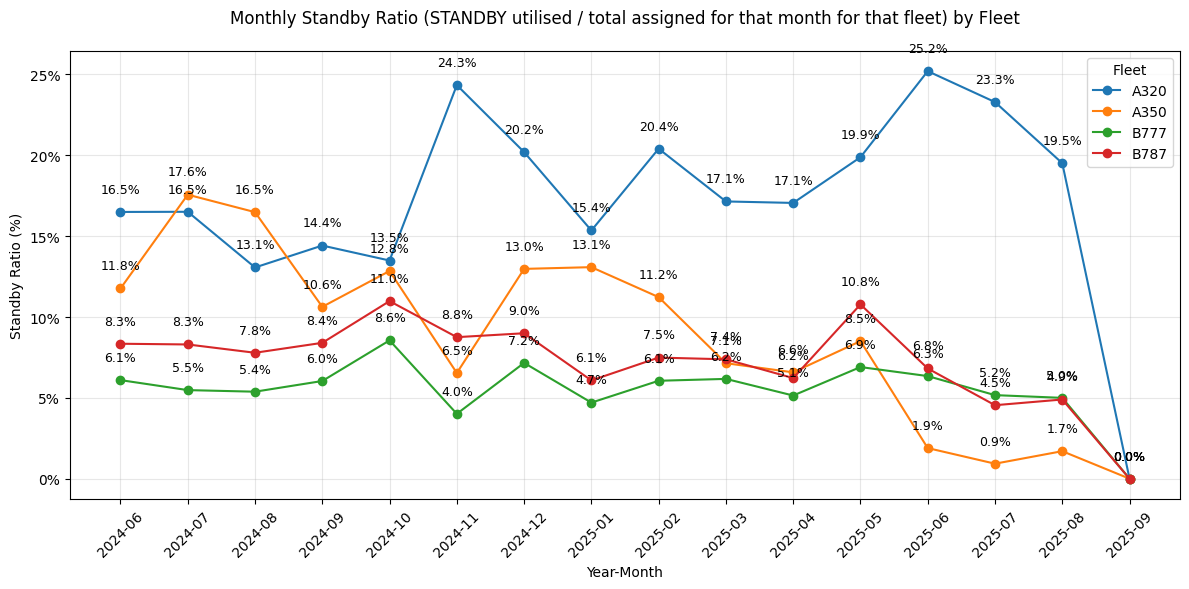

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and extract year-month
all_data_new['start_date'] = pd.to_datetime(all_data_new['start_date'], format="%d-%m-%Y")
all_data_new['year_month'] = all_data_new['start_date'].dt.to_period('M')

# Count standby occurrences for each code type by fleet and month
counts = all_data_new.groupby(['year_month', 'Fleet']).agg(
    standby_x=('code_type_PLANNED', lambda x: (x == 'STANDBY').sum()),
    standby_y=('status', lambda y: (y == 'sby to (fly and dhd)').sum())
).reset_index()

# Calculate the percentage ratio (y/x) for each fleet-month
counts['standby_ratio'] = (counts['standby_y'] / counts['standby_x']) * 100

# Handle infinite/divide by zero cases
counts.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
for fleet in counts['Fleet'].unique():
    fleet_data = counts[counts['Fleet'] == fleet]
    x_vals = fleet_data['year_month'].astype(str)
    y_vals = fleet_data['standby_ratio']

    plt.plot(x_vals, y_vals, marker='o', label=fleet)

    # Annotate each point with its percentage
    for i in range(len(x_vals)):
        plt.text(x_vals.iloc[i], y_vals.iloc[i] + 1,  # slight vertical offset
                 f"{y_vals.iloc[i]:.1f}%",
                 ha='center', va='bottom',
                 fontsize=9, color='black')

plt.title('Monthly Standby Ratio (STANDBY utilised / total assigned for that month for that fleet) by Fleet', pad=20)
plt.xlabel('Year-Month')
plt.ylabel('Standby Ratio (%)')
plt.xticks(rotation=45)
plt.legend(title='Fleet')
plt.grid(True, alpha=0.3)

# Format y-axis as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.tight_layout()
plt.show()

In [137]:
# all_data_new[all_data_new['new_status']=='not utilised (sby to dhp)']
all_data_new['new_status'].unique()

array(['unmatched flown (STANDBY)',
       'unmatched flown (DEADHEAD AND TRAVEL)',
       'unmatched flown (GROUND)', 'unmatched flown (OFF)',
       'unmatched plan (GROUND)', 'standby to standby',
       'unmatched plan (OFF)', 'unmatched plan (STANDBY)',
       'unmatched flown (GROUND TRAINING)', 'unmatched plan (LEAVE)',
       'unmatched flown (LEAVE)', 'unmatched flown (SIMDUTY)',
       'unmatched plan (DEADHEAD AND TRAVEL)', 'unmatched plan (SIMDUTY)',
       'unmatched flown (FLY)', 'non-standby planned (FLY)',
       'unmatched flown (SICK LEAVE)', 'unmatched plan (SICK LEAVE)',
       'sby to fly and dhd', 'unmatched plan (GROUND TRAINING)',
       'not utilised (sby to dhp)', 'unmatched flown (DEADHEAD)',
       'utilised (combined)', 'unmatched plan (DEADHEAD)',
       'paired with standby (GROUND)', 'FLY matched',
       'paired with standby (GROUND TRAINING)',
       'non-standby planned (UNUSED)', 'unmatched flown (UNUSED)',
       'paired with standby (SIMDUTY)', 'pa

In [154]:
[val for val in all_data_new['new_status'].unique() if 'combined' in str(val)]

['utilised (combined)']

## Weekly standby utilisation plots 

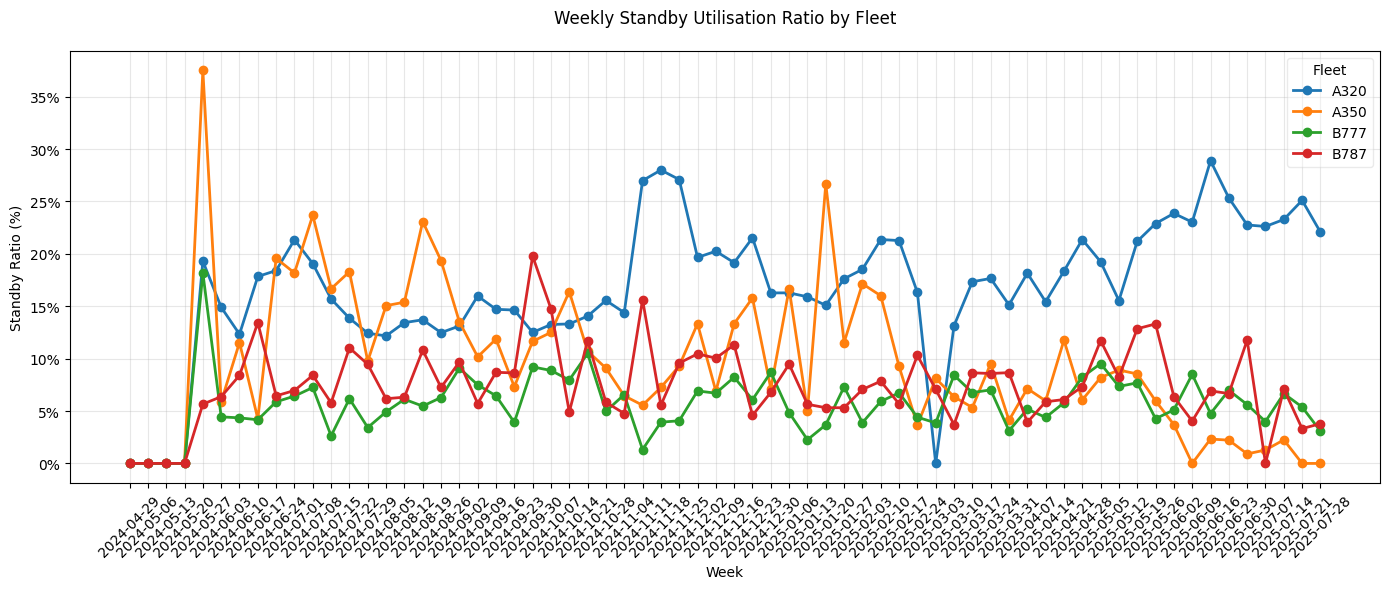

In [113]:
# Create weekly period
all_data_new['week'] = all_data_new['start_date'].dt.to_period('W').apply(lambda r: r.start_time.date())

# Group by week and fleet
weekly_counts = all_data_new.groupby(['week', 'Fleet']).agg(
    standby_x=('code_type_PLANNED', lambda x: (x == 'STANDBY').sum()),
    standby_y=('status', lambda y: (y == 'sby to fly and dhd').sum())
).reset_index()

# Calculate ratio
weekly_counts['standby_ratio'] = (weekly_counts['standby_y'] / weekly_counts['standby_x']) * 100
weekly_counts.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Plot
plt.figure(figsize=(14, 6))
for fleet in weekly_counts['Fleet'].unique():
    fleet_data = weekly_counts[weekly_counts['Fleet'] == fleet]
    x_vals = fleet_data['week'].astype(str)
    y_vals = fleet_data['standby_ratio']

    plt.plot(x_vals, y_vals, label=fleet, marker='o', linewidth=2)

plt.title('Weekly Standby Utilisation Ratio by Fleet', pad=20)
plt.xlabel('Week')
plt.ylabel('Standby Ratio (%)')
plt.xticks(rotation=45)
plt.legend(title='Fleet', framealpha=0.4, fancybox=True)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.tight_layout()
plt.show()

## daily standby utilisation plots

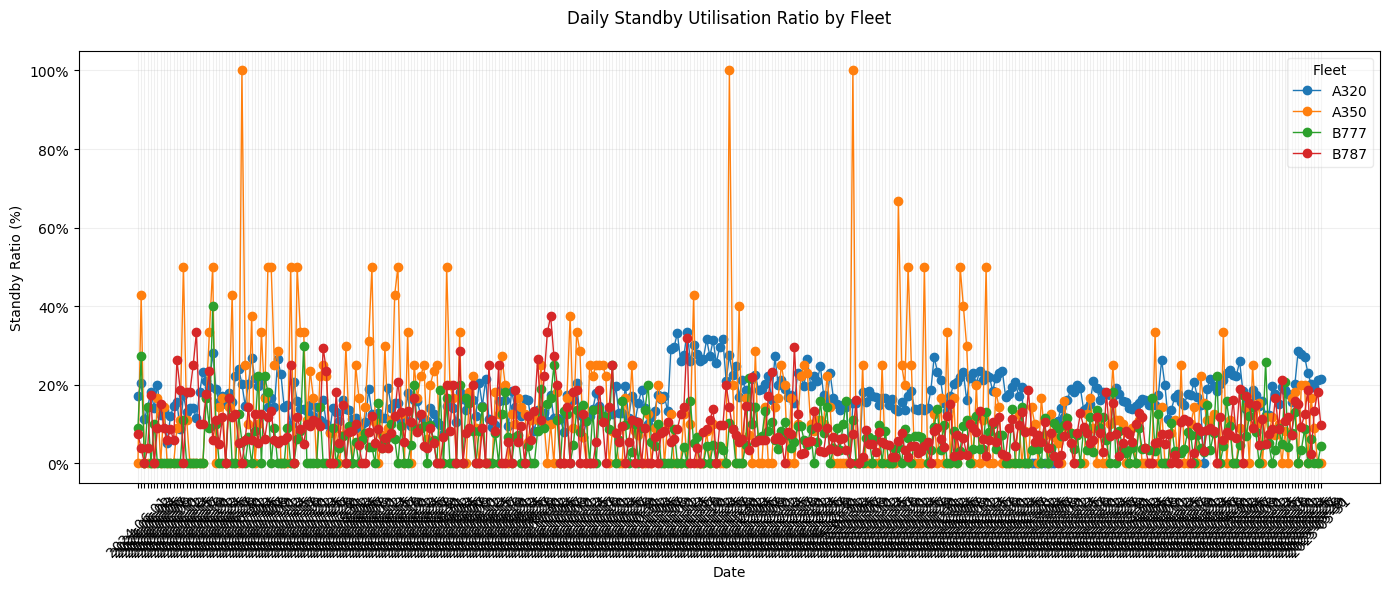

In [83]:
# Extract day from start_date
all_data['day'] = all_data['start_date'].dt.date

# Group by day and fleet
daily_counts = all_data.groupby(['day', 'Fleet']).agg(
    standby_x=('code_type_PLANNED', lambda x: (x == 'STANDBY').sum()),
    standby_y=('status', lambda y: (y == 'sby to fly and dhd').sum())
).reset_index()

# Compute ratio
daily_counts['standby_ratio'] = (daily_counts['standby_y'] / daily_counts['standby_x']) * 100
daily_counts.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Plot
plt.figure(figsize=(14, 6))
for fleet in daily_counts['Fleet'].unique():
    fleet_data = daily_counts[daily_counts['Fleet'] == fleet]
    x_vals = fleet_data['day'].astype(str)
    y_vals = fleet_data['standby_ratio']

    plt.plot(x_vals, y_vals, label=fleet, marker='o', linewidth=1)

plt.title('Daily Standby Utilisation Ratio by Fleet', pad=20)
plt.xlabel('Date')
plt.ylabel('Standby Ratio (%)')
plt.xticks(rotation=45)
plt.legend(title='Fleet', framealpha=0.4, fancybox=True)
plt.grid(True, alpha=0.2)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.tight_layout()
plt.show()

In [78]:
# counts

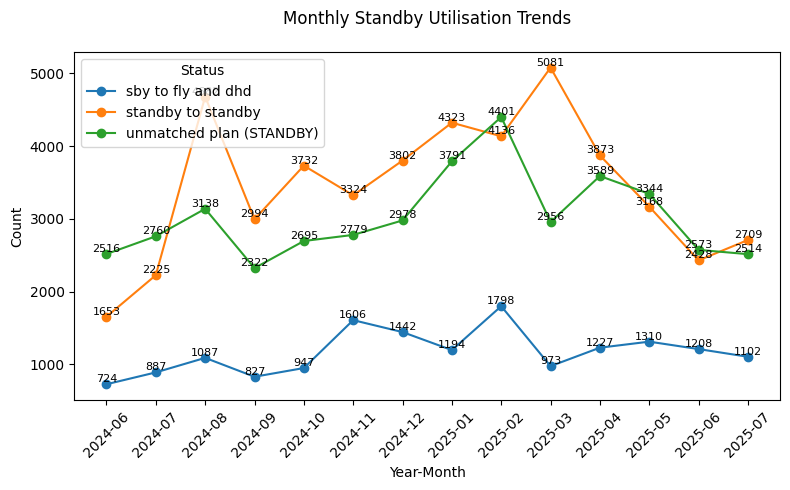

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and extract year-month
all_data_new['start_date'] = pd.to_datetime(all_data_new['start_date'], format="%d-%m-%Y")
all_data_new['year_month'] = all_data_new['start_date'].dt.to_period('M').astype(str)

# Define desired status categories
desired_statuses = [
    'sby to fly and dhd',
    'standby to standby',
    'unmatched plan (STANDBY)'
]

# Filter only relevant statuses
filtered_data = all_data_new[all_data_new['status'].isin(desired_statuses)]

# Group and pivot
status_counts = filtered_data.groupby(['year_month', 'status']).size().reset_index(name='count')
status_pivot = status_counts.pivot(index='year_month', columns='status', values='count').fillna(0)

# Plot
plt.figure(figsize=(8, 5))
for status in status_pivot.columns:
    plt.plot(status_pivot.index, status_pivot[status], marker='o', label=status)

    for i in range(len(status_pivot.index)):
        plt.text(status_pivot.index[i], status_pivot[status].iloc[i] + 0.5,
                 f"{int(status_pivot[status].iloc[i])}",
                 ha='center', va='bottom', fontsize=8)

plt.title('Monthly Standby Utilisation Trends', pad=20)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

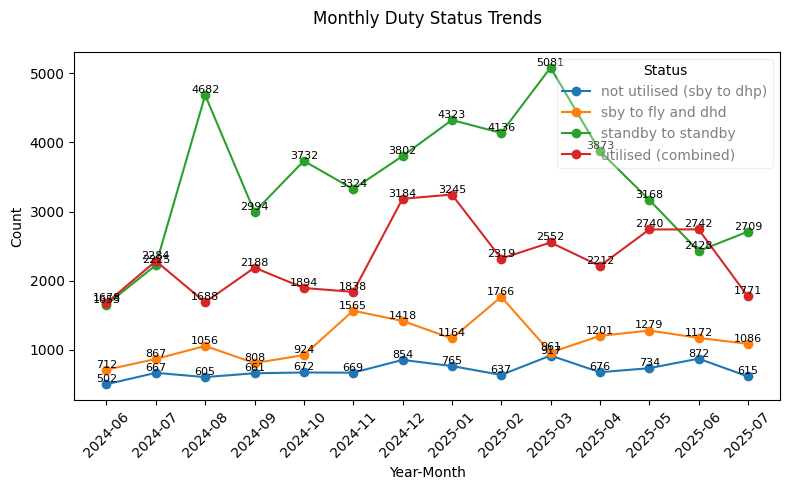

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and extract year-month
all_data_new['start_date'] = pd.to_datetime(all_data_new['start_date'], format="%d-%m-%Y")
all_data_new['year_month'] = all_data_new['start_date'].dt.to_period('M').astype(str)

# Define exact matches and prefix logic
desired_exact = [
    'sby to fly and dhd',
    'standby to standby',
    # 'unmatched plan (STANDBY)',
    'not utilised (sby to dhp)',
    'utilised (combined)'
]

# Create filter mask
# filtered_mask = (
#     all_data_new['new_status'].isin(desired_exact) |
#     all_data_new['new_status'].str.startswith('utilised')
# )

filtered_mask = (
    all_data_new['new_status'].isin(desired_exact) #|
    # all_data_new['new_status'].str.startswith('utilised')
)

# Apply filter
filtered_data = all_data_new[filtered_mask]

# Group and pivot
status_counts = filtered_data.groupby(['year_month', 'new_status']).size().reset_index(name='count')
status_pivot = status_counts.pivot(index='year_month', columns='new_status', values='count').fillna(0)

# Plot
plt.figure(figsize=(8, 5))
for status in status_pivot.columns:
    plt.plot(status_pivot.index, status_pivot[status], marker='o', label=status)

    for i in range(len(status_pivot.index)):
        plt.text(status_pivot.index[i], status_pivot[status].iloc[i] + 0.5,
                 f"{int(status_pivot[status].iloc[i])}",
                 ha='center', va='bottom', fontsize=8)

plt.title('Monthly Duty Status Trends', pad=20)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
legend = plt.legend(title='Status', framealpha=0.3, fancybox=True)
plt.setp(legend.get_texts(), color='gray')  # Fades legend font to gray
plt.tight_layout()
plt.show()

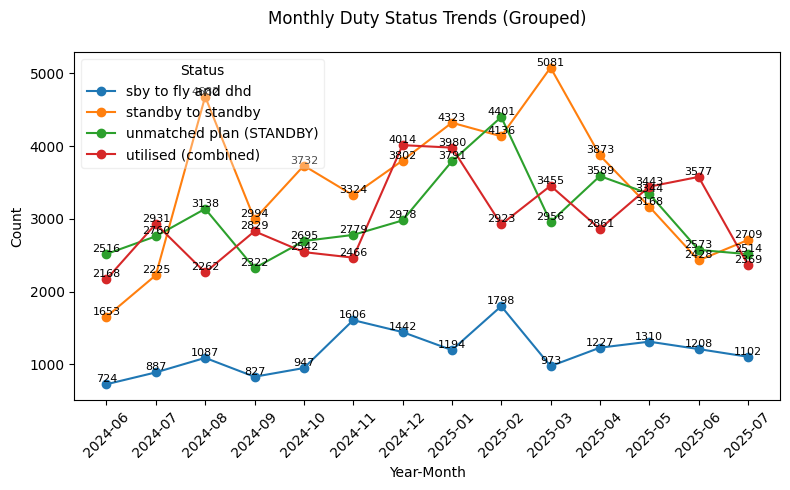

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and extract year-month
all_data['start_date'] = pd.to_datetime(all_data['start_date'], format="%d-%m-%Y")
all_data['year_month'] = all_data['start_date'].dt.to_period('M').astype(str)

# Define exact matches
desired_exact = [
    'sby to fly and dhd',
    'standby to standby',
    'unmatched plan (STANDBY)'
]

# Create a copy and remap 'utilised*' statuses to a common label
filtered_data = all_data[
    all_data['status'].isin(desired_exact) | all_data['status'].str.startswith('utilised')
].copy()

filtered_data.loc[filtered_data['status'].str.startswith('utilised'), 'status'] = 'utilised (combined)'

# Group and pivot
status_counts = filtered_data.groupby(['year_month', 'status']).size().reset_index(name='count')
status_pivot = status_counts.pivot(index='year_month', columns='status', values='count').fillna(0)

# Plot
plt.figure(figsize=(8, 5))
for status in status_pivot.columns:
    plt.plot(status_pivot.index, status_pivot[status], marker='o', label=status)

    for i in range(len(status_pivot.index)):
        plt.text(status_pivot.index[i], status_pivot[status].iloc[i] + 0.5,
                 f"{int(status_pivot[status].iloc[i])}",
                 ha='center', va='bottom', fontsize=8)

plt.title('Monthly Duty Status Trends (Grouped)', pad=20)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
legend = plt.legend(title='Status', framealpha=0.3)
# plt.setp(legend.get_texts(), color='gray')  # Faded legend text
plt.tight_layout()
plt.show()

In [106]:
filtered_data = filtered_data[filtered_data["status"]=="utilised (combined)"]
filtered_data

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
305844             80055580.0           CP               DEL          A320   
305906             80051889.0           FO               BOM          A320   
305939             81012122.0           CP               DEL          B777   
306063             80006767.0           CP               DEL          B777   
306110             80006743.0           CP               BOM          B777   
...                       ...          ...               ...           ...   
1789865            80037543.0           FO               DEL          B787   
1790000            80059794.0           FO               BOM          A320   
1790016            80045312.0           FO               BOM          A320   
1790059            80041508.0           FO               HYD          B787   
1790095            80050015.0           FO               BOM          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
305844                        REST                   NaN   
305906                        REST                   NaN   
305939                        REST                   NaN   
306063                        REST                   NaN   
306110                         DHP                   NaN   
...                            ...                   ...   
1789865                       REST                   NaN   
1790000                       REST                   NaN   
1790016                       REST                   NaN   
1790059                        DHP                   NaN   
1790095                        DHP                   NaN   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
305844                       NaN                      NaN   
305906                       NaN                      NaN   
305939                       NaN                      NaN   
306063                       NaN                      NaN   
306110                       NaN                      NaN   
...                          ...                      ...   
1789865                      NaN                      NaN   
1790000                      NaN                      NaN   
1790016                      NaN                      NaN   
1790059                      NaN                      NaN   
1790095                      NaN                      NaN   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
305844               2024-08-12 00:00:00            2024-08-12 23:59:00   
305906               2025-04-15 00:00:00            2025-04-15 23:59:00   
305939               2024-11-29 00:00:00            2024-11-29 23:59:00   
306063               2024-07-30 00:00:00            2024-07-30 23:59:00   
306110               2025-05-26 15:45:00            2025-05-26 18:05:00   
...                                  ...                            ...   
1789865              2024-09-07 00:00:00            2024-09-07 23:59:00   
1790000              2025-03-15 00:00:00            2025-03-15 23:59:00   
1790016              2024-12-20 00:00:00            2024-12-20 23:59:00   
1790059              2024-11-22 17:55:00            2024-11-22 19:30:00   
1790095              2024-06-20 14:45:00            2024-06-20 17:00:00   

        code_type_PLANNED start_date_PLANNED duty_key  STAFF NUMBER_FLOWN  \
305844             GROUND         2024-08-12      NaN          80055580.0   
305906             GROUND         2025-04-15      NaN          80051889.0   
305939             GROUND         2024-11-29      NaN          81012122.0   
306063             GROUND         2024-07-30      NaN          80006767.0   
306110           DEADHEAD         2025-05-26      NaN          80006743.0   
...                   ...                ...      ...                 ...   
1789865            GROUND         2024-09-07      NaN          80037543.0   
1790000            GROUND         2025-03-15      NaN          80059794.0   
1790016            GROUN

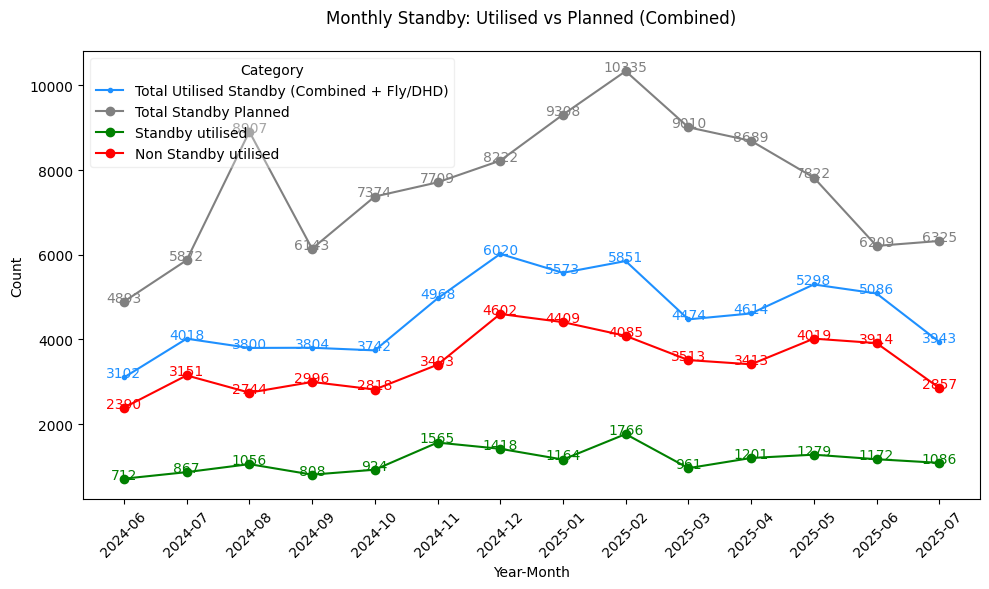

In [148]:
import pandas as pd
import matplotlib.pyplot as plt


# 1️⃣ Count total standby in planned
standby_planned = all_data_new[all_data_new['code_type_PLANNED'] == 'STANDBY']
planned_counts = standby_planned.groupby('year_month').size()

# 2️⃣ Count utilised (combined only)
# utilised_combined = filtered_data[filtered_data['status'] == 'utilised (combined)']
utilised_combined = filtered_data[filtered_data['new_status'].isin([ 'utilised (combined)','sby to fly and dhd'])]
utilised_combined_counts = utilised_combined.groupby('year_month').size()

# 3️⃣ Count 'sby to fly and dhd'
# fly_dhd_counts = all_data[all_data['status'] == 'sby to fly and dhd'].groupby('year_month').size()
fly_dhd_counts = all_data_new[all_data_new['new_status'] == 'sby to fly and dhd'].groupby('year_month').size()

# 4️⃣ Add both utilised components
total_utilised = utilised_combined_counts.add(fly_dhd_counts, fill_value=0)

# 🖼️ Plot
plt.figure(figsize=(10, 6))
plt.plot(total_utilised.index, total_utilised.values,
         marker='.', label='Total Utilised Standby (Combined + Fly/DHD)', color='dodgerblue')

plt.plot(planned_counts.index, planned_counts.values,
         marker='o', label='Total Standby Planned', color='gray')

plt.plot(fly_dhd_counts.index, fly_dhd_counts.values,
         marker='o', label='Standby utilised', color='green')

plt.plot(utilised_combined_counts.index, utilised_combined_counts.values,
         marker='o', label='Non Standby utilised', color='red')

# 🖍️ Annotate points
for i in range(len(total_utilised.index)):
    plt.text(total_utilised.index[i], total_utilised.values[i] + 2,
             f"{int(total_utilised.values[i])}", ha='center', color='dodgerblue')
for i in range(len(planned_counts.index)):
    plt.text(planned_counts.index[i], planned_counts.values[i] + 2,
             f"{int(planned_counts.values[i])}", ha='center', color='gray')
for i in range(len(utilised_combined_counts.index)):
    plt.text(utilised_combined_counts.index[i], utilised_combined_counts.values[i] + 2,
             f"{int(utilised_combined_counts.values[i])}", ha='center', color='red')
for i in range(len(fly_dhd_counts.index)):
    plt.text(fly_dhd_counts.index[i], fly_dhd_counts.values[i] + 2,
             f"{int(fly_dhd_counts.values[i])}", ha='center', color='green')

# 🎨 Styling
plt.title('Monthly Standby: Utilised vs Planned (Combined)', pad=20)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
legend = plt.legend(title='Category', framealpha=0.3)
# plt.setp(legend.get_texts(), color='gray')
# plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [149]:
total_utilised

year_month
2024-06    3102
2024-07    4018
2024-08    3800
2024-09    3804
2024-10    3742
2024-11    4968
2024-12    6020
2025-01    5573
2025-02    5851
2025-03    4474
2025-04    4614
2025-05    5298
2025-06    5086
2025-07    3943
dtype: int64

## Daily

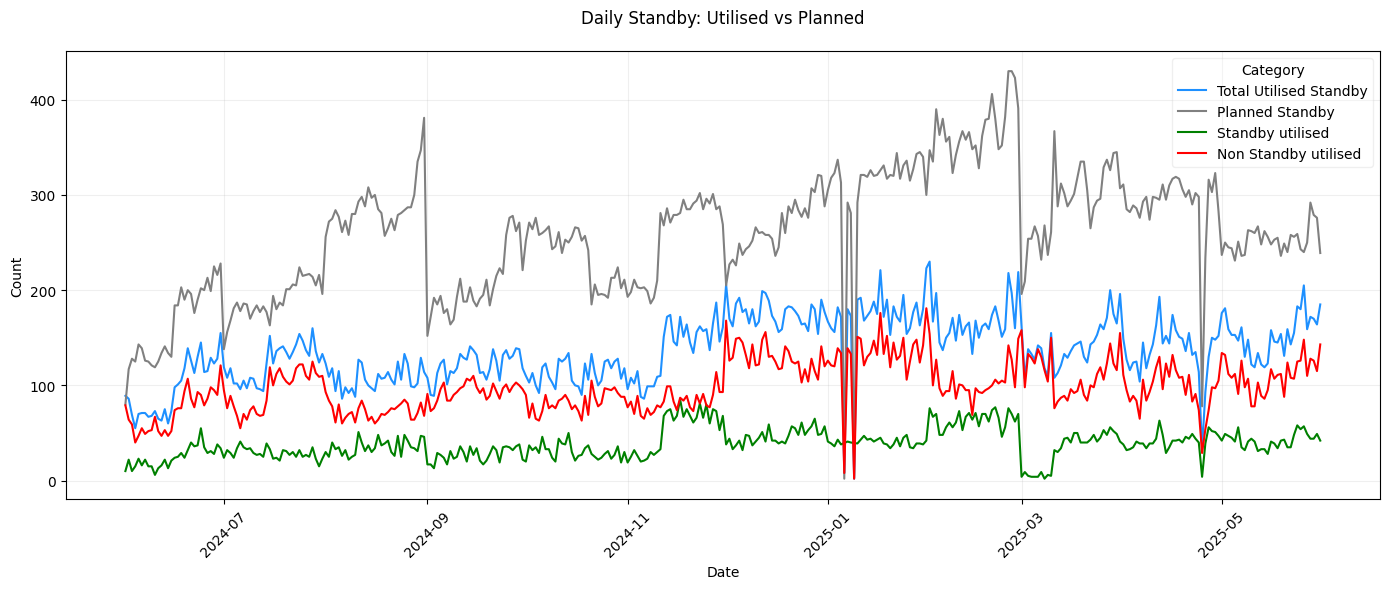

In [119]:
# Convert to clean date format
all_data['start_date'] = pd.to_datetime(all_data['start_date'], errors='coerce')
all_data['date'] = all_data['start_date'].dt.normalize()

filtered_data['start_date'] = pd.to_datetime(filtered_data['start_date'], errors='coerce')
filtered_data.dropna(subset=['start_date'], inplace=True)
filtered_data['date'] = filtered_data['start_date'].dt.normalize()

# Daily planned standby
daily_planned = all_data[all_data['code_type_PLANNED'] == 'STANDBY'].groupby('date').size()

# Daily utilised (combined only)
daily_utilised_combined = filtered_data[filtered_data['status'] == 'utilised (combined)'].groupby('date').size()

# Daily fly/dhd
daily_fly_dhd = all_data[all_data['status'] == 'sby to fly and dhd'].groupby('date').size()

# Combined actual utilisation
daily_total_utilised = daily_utilised_combined.add(daily_fly_dhd, fill_value=0)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_total_utilised.index, daily_total_utilised.values, label='Total Utilised Standby', color='dodgerblue')
plt.plot(daily_planned.index, daily_planned.values, label='Planned Standby', color='gray')
plt.plot(daily_fly_dhd.index, daily_fly_dhd.values, label='Standby utilised', color='green')
plt.plot(daily_utilised_combined.index, daily_utilised_combined.values, label='Non Standby utilised', color='red')

plt.title('Daily Standby: Utilised vs Planned', pad=20)
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', framealpha=0.3)
plt.tight_layout()
plt.grid(True, alpha=0.2)
plt.show()

## Daily fleetwise

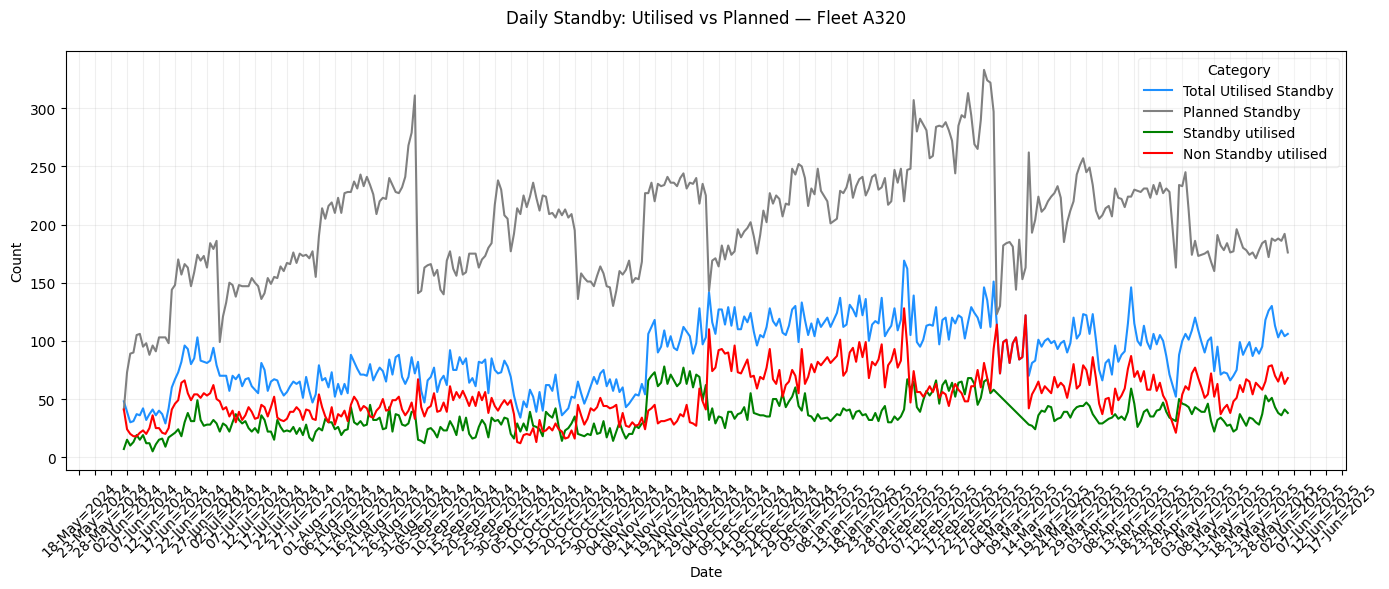

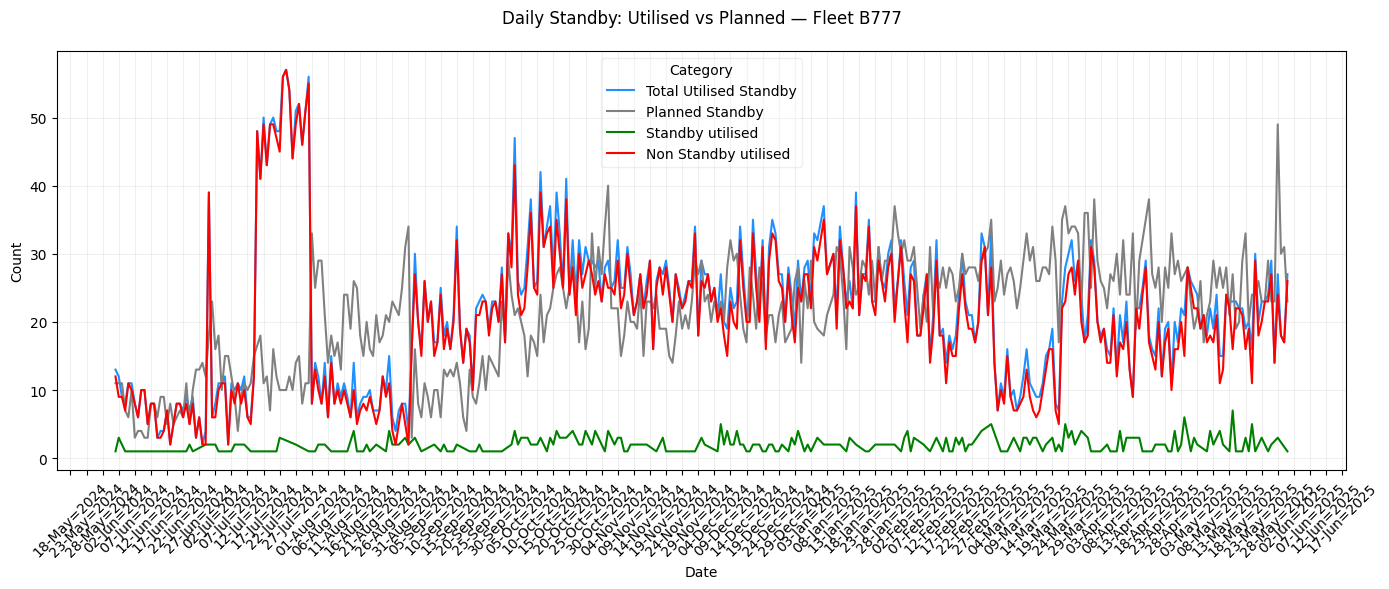

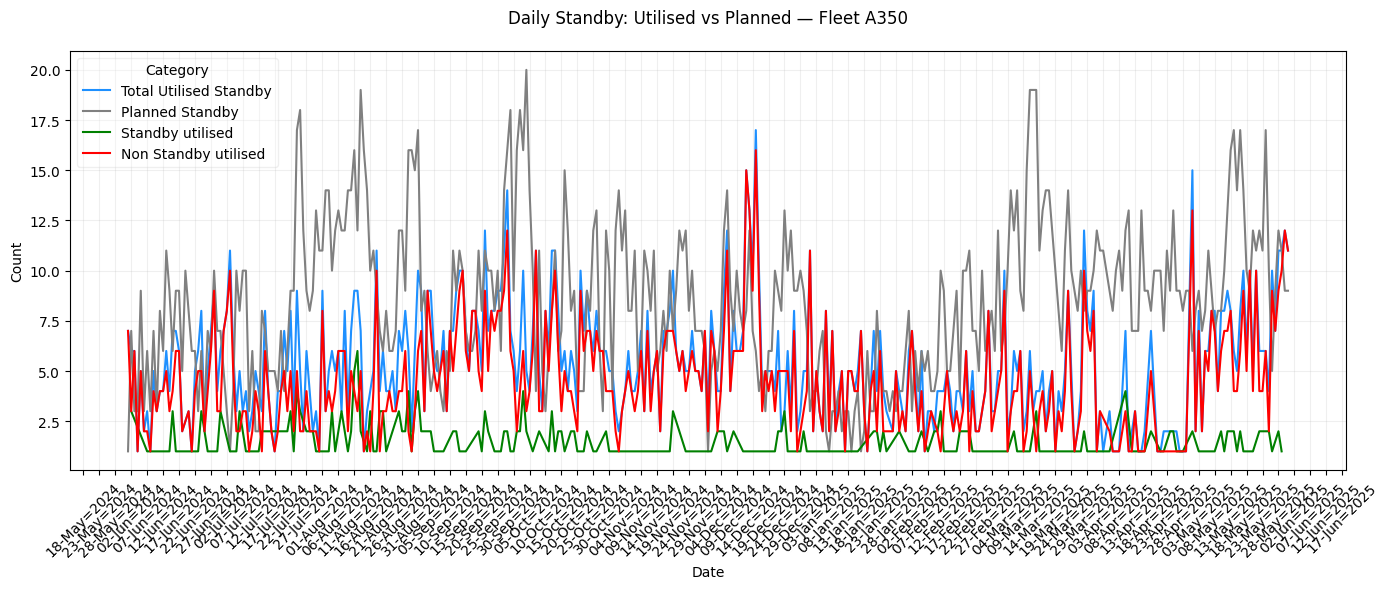

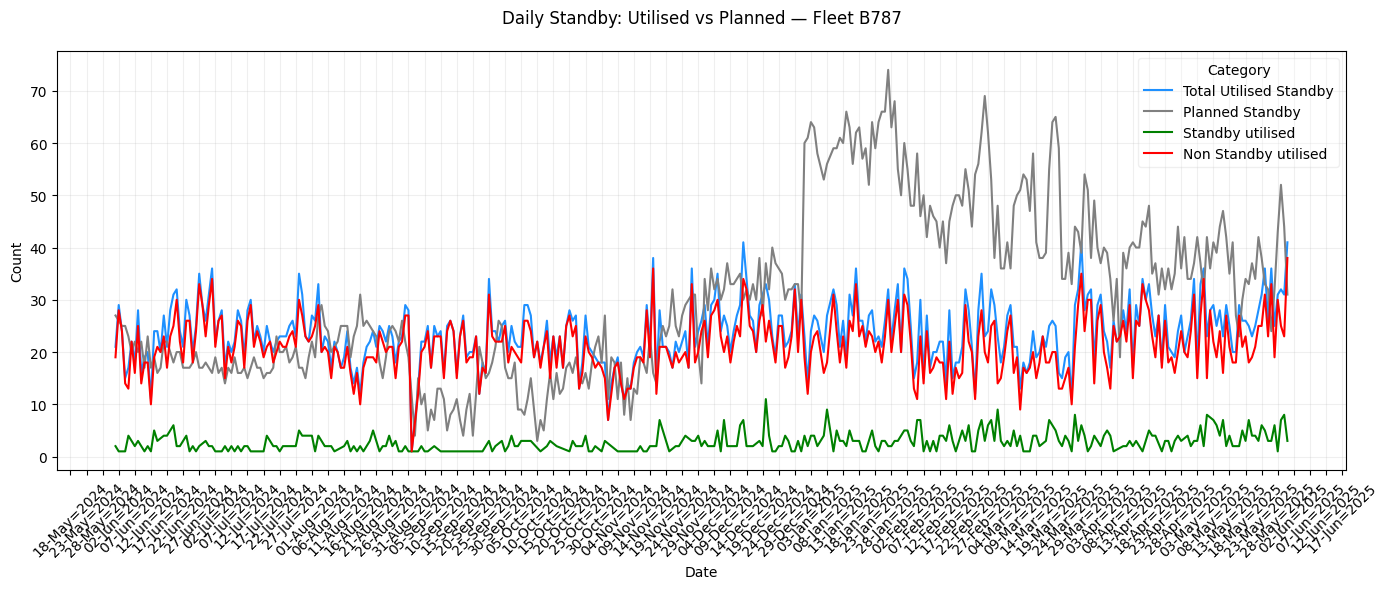

In [125]:
import matplotlib.pyplot as plt

# 1️⃣ Prepare date columns
all_data['start_date'] = pd.to_datetime(all_data['start_date'], errors='coerce')
all_data['date'] = all_data['start_date'].dt.normalize()

filtered_data['start_date'] = pd.to_datetime(filtered_data['start_date'], errors='coerce')
filtered_data['date'] = filtered_data['start_date'].dt.normalize()

# 2️⃣ Loop through each fleet
for fleet in all_data['Fleet'].dropna().unique():
    # Filter for the fleet
    fleet_all = all_data[all_data['Fleet'] == fleet]
    fleet_filtered = filtered_data[filtered_data['Fleet'] == fleet]

    # Planned standby
    daily_planned = fleet_all[fleet_all['code_type_PLANNED'] == 'STANDBY'].groupby('date').size()

    # Utilised (combined)
    daily_utilised_combined = fleet_filtered[fleet_filtered['status'] == 'utilised (combined)'].groupby('date').size()

    # Standby utilised → fly/dhd
    daily_fly_dhd = fleet_all[fleet_all['status'] == 'sby to fly and dhd'].groupby('date').size()

    # Total utilised = utilised_combined + fly_dhd
    daily_total_utilised = daily_utilised_combined.add(daily_fly_dhd, fill_value=0)

    # 3️⃣ Plot
    plt.figure(figsize=(14, 6))
    plt.plot(daily_total_utilised.index, daily_total_utilised.values,
             label='Total Utilised Standby', color='dodgerblue')
    plt.plot(daily_planned.index, daily_planned.values,
             label='Planned Standby', color='gray')
    plt.plot(daily_fly_dhd.index, daily_fly_dhd.values,
             label='Standby utilised', color='green')
    plt.plot(daily_utilised_combined.index, daily_utilised_combined.values,
             label='Non Standby utilised', color='red')

    plt.title(f'Daily Standby: Utilised vs Planned — Fleet {fleet}', pad=20)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Category', framealpha=0.3)
    plt.grid(True, alpha=0.2)
    import matplotlib.dates as mdates

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))        # Show every 5th day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b=%Y'))      # Format as 'DD-MMM'
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Weekly 

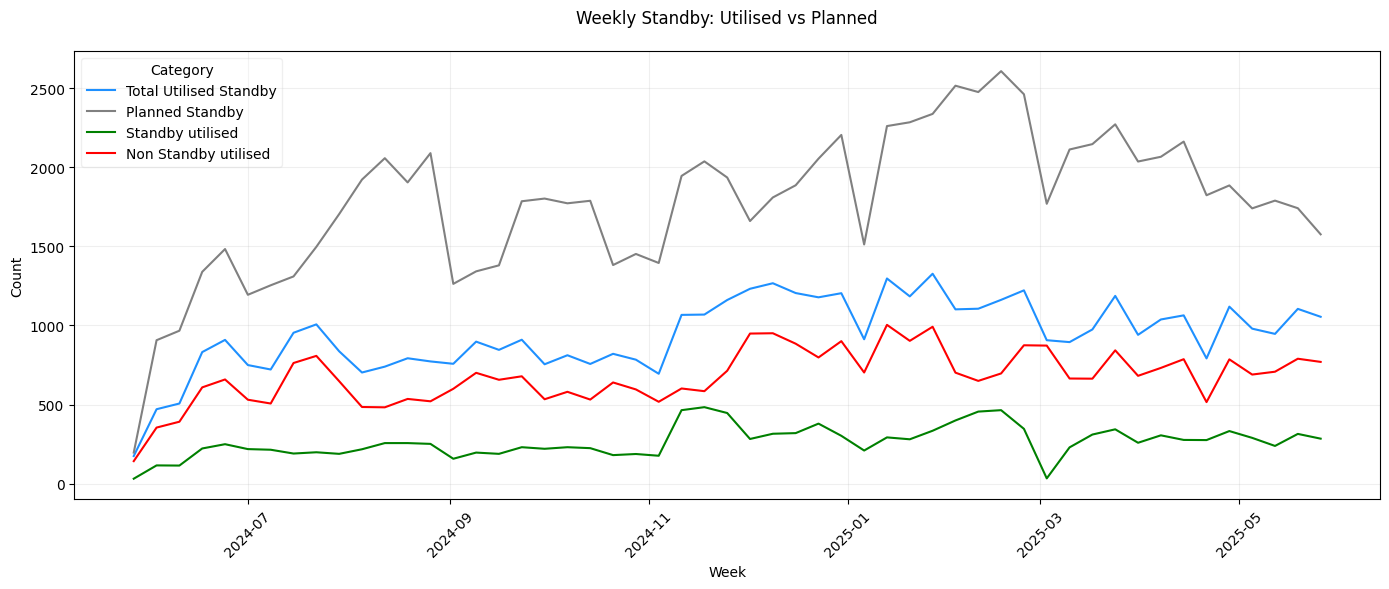

In [120]:
# Create weekly buckets
all_data['week'] = all_data['start_date'].dt.to_period('W').apply(lambda r: r.start_time.date())
filtered_data['week'] = pd.to_datetime(filtered_data['start_date'], errors='coerce').dt.to_period('W').apply(lambda r: r.start_time.date())

# Weekly planned standby
weekly_planned = all_data[all_data['code_type_PLANNED'] == 'STANDBY'].groupby('week').size()

# Weekly utilised (combined)
weekly_utilised_combined = filtered_data[filtered_data['status'] == 'utilised (combined)'].groupby('week').size()

# Weekly fly/dhd
weekly_fly_dhd = all_data[all_data['status'] == 'sby to fly and dhd'].groupby('week').size()

# Weekly total utilised
weekly_total_utilised = weekly_utilised_combined.add(weekly_fly_dhd, fill_value=0)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(weekly_total_utilised.index, weekly_total_utilised.values, label='Total Utilised Standby', color='dodgerblue')
plt.plot(weekly_planned.index, weekly_planned.values, label='Planned Standby', color='gray')
plt.plot(weekly_fly_dhd.index, weekly_fly_dhd.values, label='Standby utilised', color='green')
plt.plot(weekly_utilised_combined.index, weekly_utilised_combined.values, label='Non Standby utilised', color='red')

plt.title('Weekly Standby: Utilised vs Planned', pad=20)
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', framealpha=0.3)
plt.tight_layout()
plt.grid(True, alpha=0.2)
plt.show()

## Weekly fleetwise

A320 weekly data is week
2024-05-27     22
2024-06-03    100
2024-06-10     92
2024-06-17    193
2024-06-24    225
2024-07-01    199
2024-07-08    189
2024-07-15    171
2024-07-22    163
2024-07-29    164
2024-08-05    189
2024-08-12    221
2024-08-19    217
2024-08-26    213
2024-09-02    140
2024-09-09    180
2024-09-16    173
2024-09-23    209
2024-09-30    178
2024-10-07    204
2024-10-14    194
2024-10-21    145
2024-10-28    160
2024-11-04    159
2024-11-11    442
2024-11-18    465
2024-11-25    417
2024-12-02    243
2024-12-09    276
2024-12-16    279
2024-12-23    346
2024-12-30    267
2025-01-06    180
2025-01-13    266
2025-01-20    247
2025-01-27    298
2025-02-03    363
2025-02-10    413
2025-02-17    427
2025-02-24    296
2025-03-10    194
2025-03-17    263
2025-03-24    296
2025-03-31    226
2025-04-07    281
2025-04-14    247
2025-04-21    242
2025-04-28    294
2025-05-05    235
2025-05-12    197
2025-05-19    263
2025-05-26    247
dtype: int64




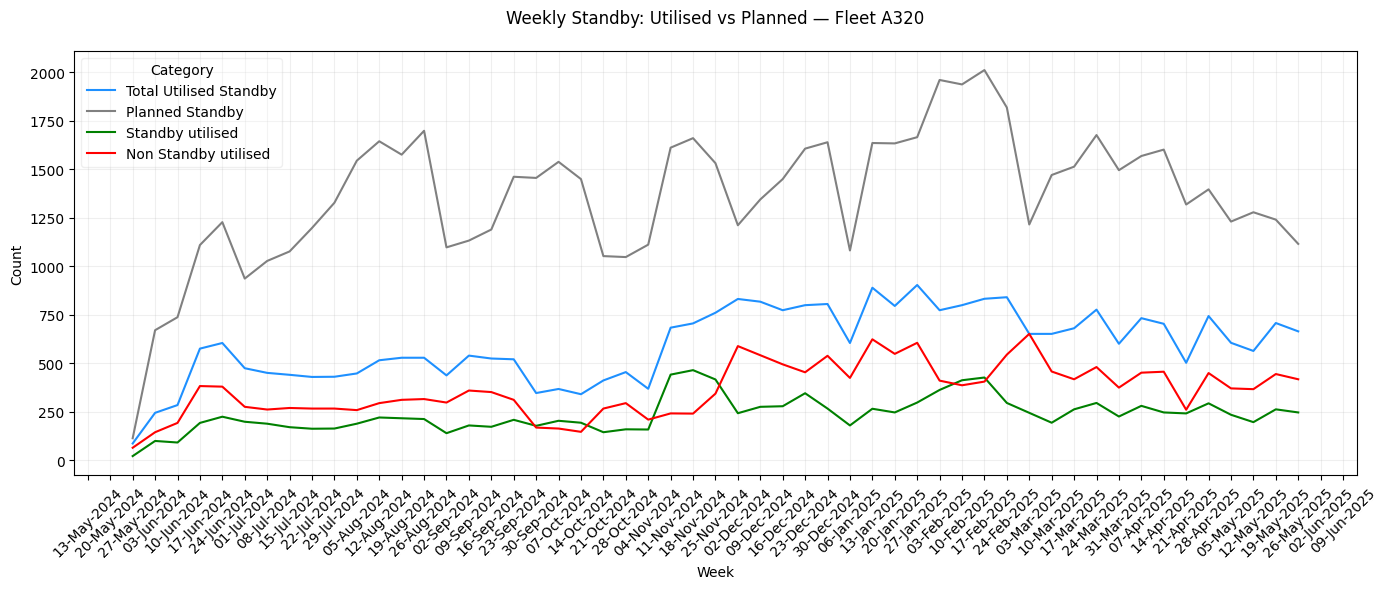

B777 weekly data is week
2024-05-27     4
2024-06-03     2
2024-06-10     1
2024-06-17     2
2024-06-24     5
2024-07-01     5
2024-07-08     7
2024-07-15     3
2024-07-22     5
2024-07-29     4
2024-08-05     6
2024-08-12    10
2024-08-19     8
2024-08-26    11
2024-09-02     6
2024-09-09     7
2024-09-16     4
2024-09-23     4
2024-09-30    14
2024-10-07    11
2024-10-14    15
2024-10-21    17
2024-10-28    14
2024-11-04    10
2024-11-11     3
2024-11-18     6
2024-11-25     8
2024-12-02    12
2024-12-09    14
2024-12-16    12
2024-12-23    10
2024-12-30    13
2025-01-06     6
2025-01-13     6
2025-01-20     8
2025-01-27    14
2025-02-03     7
2025-02-10    11
2025-02-17    13
2025-02-24     9
2025-03-03     7
2025-03-10    17
2025-03-17    14
2025-03-24    16
2025-03-31     6
2025-04-07    10
2025-04-14     9
2025-04-21    11
2025-04-28    14
2025-05-05    16
2025-05-12    13
2025-05-19    13
2025-05-26     6
dtype: int64




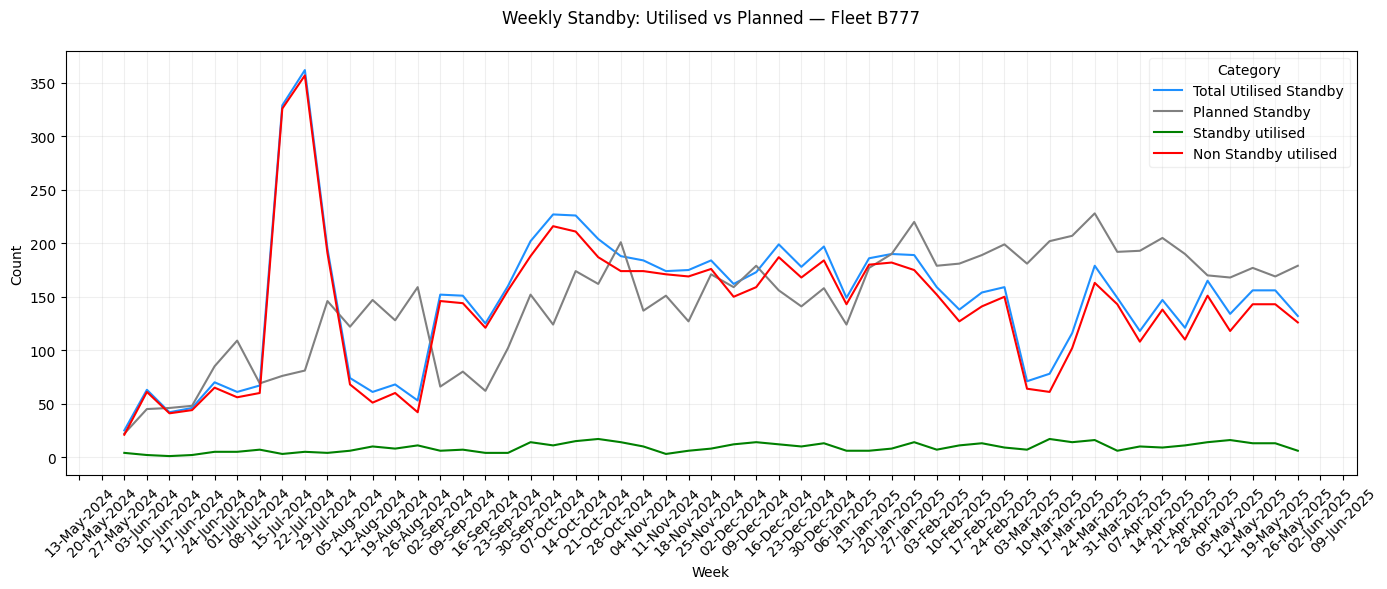

A350 weekly data is week
2024-05-27     3
2024-06-03     2
2024-06-10     6
2024-06-17     2
2024-06-24     9
2024-07-01     6
2024-07-08     9
2024-07-15     6
2024-07-22    15
2024-07-29     8
2024-08-05    14
2024-08-12    14
2024-08-19    12
2024-08-26    18
2024-09-02     5
2024-09-09     6
2024-09-16     8
2024-09-23     8
2024-09-30    12
2024-10-07     7
2024-10-14    10
2024-10-21     6
2024-10-28     6
2024-11-04     4
2024-11-11     3
2024-11-18     5
2024-11-25     3
2024-12-02     7
2024-12-09     3
2024-12-16     6
2024-12-23    10
2024-12-30     3
2025-01-06     2
2025-01-13     1
2025-01-20     8
2025-01-27     3
2025-02-03     6
2025-02-10     8
2025-02-17     5
2025-02-24     2
2025-03-03     6
2025-03-10     7
2025-03-17     4
2025-03-24     6
2025-03-31     3
2025-04-07     5
2025-04-14     4
2025-04-21     8
2025-04-28     4
2025-05-05     5
2025-05-12     9
2025-05-19     7
2025-05-26     4
dtype: int64




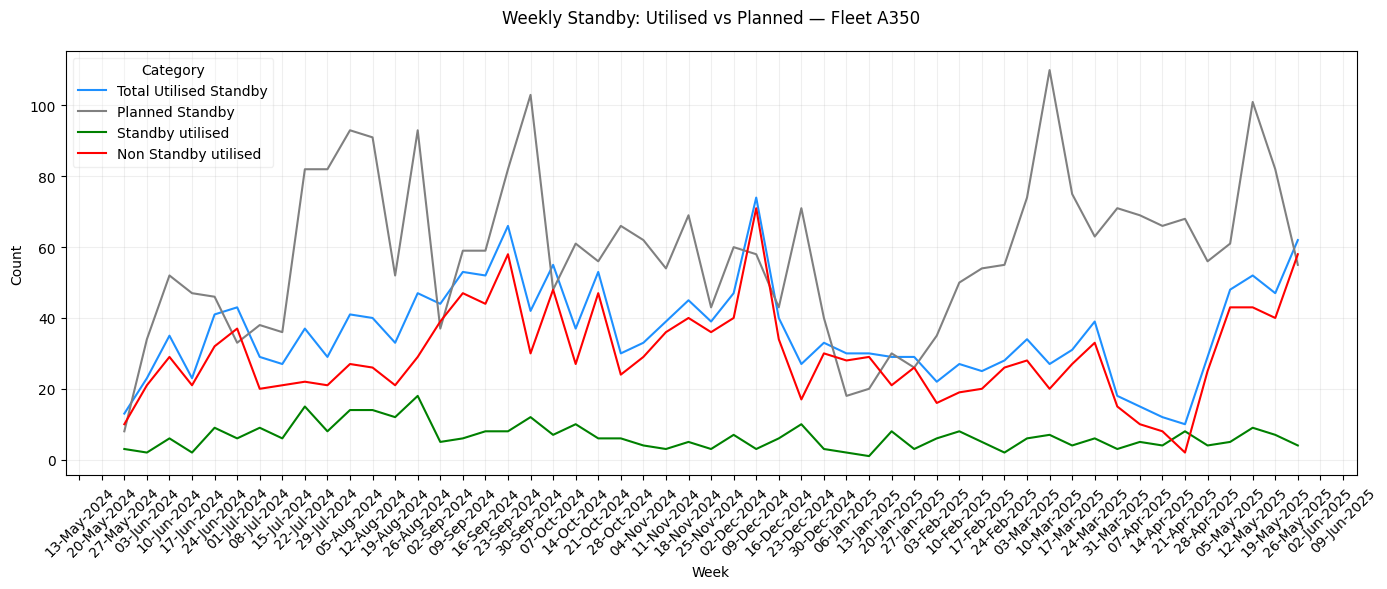

B787 weekly data is week
2024-05-27     3
2024-06-03    12
2024-06-10    16
2024-06-17    26
2024-06-24    11
2024-07-01     9
2024-07-08    10
2024-07-15    11
2024-07-22    16
2024-07-29    13
2024-08-05     9
2024-08-12    12
2024-08-19    20
2024-08-26    10
2024-09-02     7
2024-09-09     4
2024-09-16     4
2024-09-23    10
2024-09-30    17
2024-10-07     9
2024-10-14     6
2024-10-21    13
2024-10-28     8
2024-11-04     4
2024-11-11    17
2024-11-18     8
2024-11-25    19
2024-12-02    21
2024-12-09    23
2024-12-16    23
2024-12-23    14
2024-12-30    20
2025-01-06    22
2025-01-13    20
2025-01-20    18
2025-01-27    20
2025-02-03    24
2025-02-10    24
2025-02-17    20
2025-02-24    40
2025-03-03    21
2025-03-10    12
2025-03-17    30
2025-03-24    26
2025-03-31    24
2025-04-07    10
2025-04-14    17
2025-04-21    15
2025-04-28    21
2025-05-05    34
2025-05-12    20
2025-05-19    32
2025-05-26    28
dtype: int64




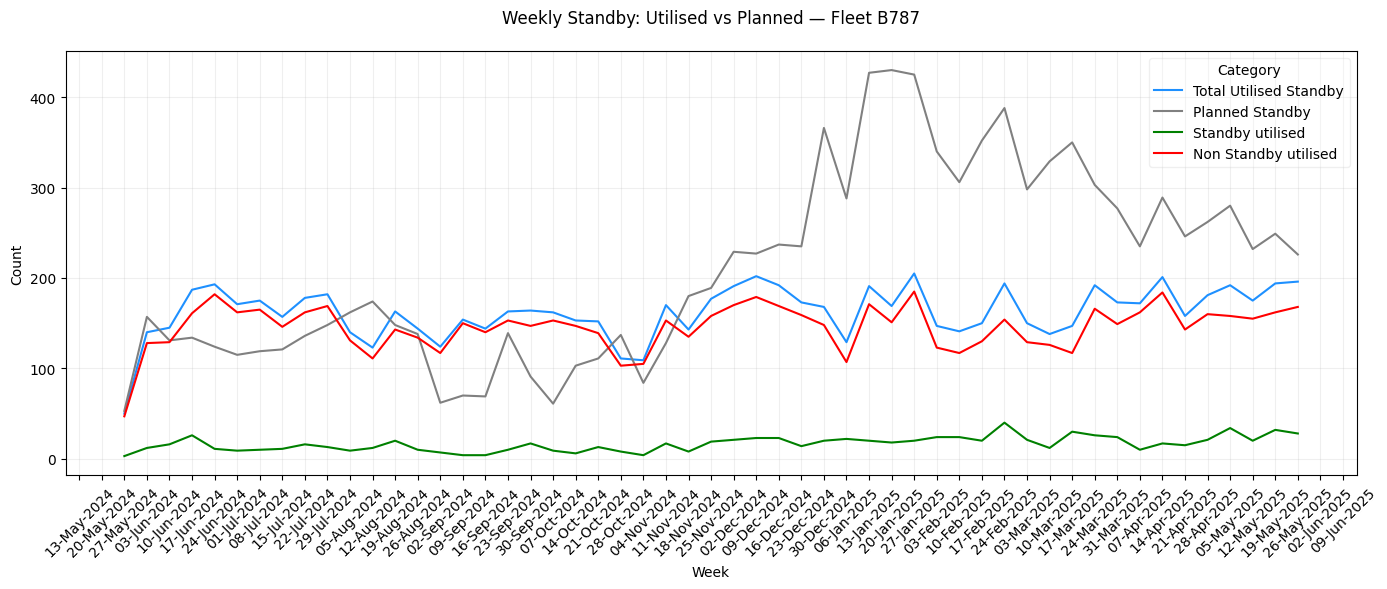

In [129]:
import matplotlib.pyplot as plt

# Make sure 'week' column exists
all_data['week'] = all_data['start_date'].dt.to_period('W').apply(lambda r: r.start_time.date())
filtered_data['week'] = pd.to_datetime(filtered_data['start_date'], errors='coerce').dt.to_period('W').apply(lambda r: r.start_time.date())

# Loop through fleets
for fleet in all_data['Fleet'].dropna().unique():
    # 🧪 Filter data for the fleet
    fleet_all = all_data[all_data['Fleet'] == fleet]
    fleet_filtered = filtered_data[filtered_data['Fleet'] == fleet]

    # Weekly planned standby
    weekly_planned = fleet_all[fleet_all['code_type_PLANNED'] == 'STANDBY'].groupby('week').size()

    # Weekly utilised (combined)
    weekly_utilised_combined = fleet_filtered[fleet_filtered['status'] == 'utilised (combined)'].groupby('week').size()

    # Weekly fly/dhd
    weekly_fly_dhd = fleet_all[fleet_all['status'] == 'sby to fly and dhd'].groupby('week').size()
    print(f"{fleet} weekly data is {weekly_fly_dhd}")
    print("\n")

    # Weekly total utilised
    weekly_total_utilised = weekly_utilised_combined.add(weekly_fly_dhd, fill_value=0)

    # 📊 Plot
    plt.figure(figsize=(14, 6))
    plt.plot(weekly_total_utilised.index, weekly_total_utilised.values,
             label='Total Utilised Standby', color='dodgerblue')
    plt.plot(weekly_planned.index, weekly_planned.values,
             label='Planned Standby', color='gray')
    plt.plot(weekly_fly_dhd.index, weekly_fly_dhd.values,
             label='Standby utilised', color='green')
    plt.plot(weekly_utilised_combined.index, weekly_utilised_combined.values,
             label='Non Standby utilised', color='red')

    plt.title(f'Weekly Standby: Utilised vs Planned — Fleet {fleet}', pad=20)
    plt.xlabel('Week')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Category', framealpha=0.3)
    import matplotlib.dates as mdates
    
    # Format x-axis to show week start dates
    ax = plt.gca()  # get current axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))  # label every Monday
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))  # format as 'DD-MMM'
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, alpha=0.2)
    plt.show()

In [2]:
utilised_data = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\standby utilisation all data with fly type and non standby utilisation as well.csv")

In [6]:
utilised_data['status'].unique()

array(['FLY matched', 'unmatched plan (GROUND)',
       'unmatched flown (GROUND)', 'unmatched flown (SICK LEAVE)',
       'unmatched flown (OFF)', 'unmatched flown (SIMDUTY)',
       'unmatched plan (OFF)', 'unmatched plan (STANDBY)',
       'unmatched flown (FLY)', 'non-standby planned (FLY)',
       'unmatched flown (STANDBY)', 'unmatched plan (DEADHEAD)',
       'unmatched flown (DEADHEAD)', 'unmatched plan (LEAVE)',
       'unmatched flown (LEAVE)', 'utilised (combined)',
       'standby to standby', 'unmatched plan (SIMDUTY)',
       'unmatched plan (GROUND TRAINING)',
       'unmatched flown (GROUND TRAINING)',
       'unmatched plan (DEADHEAD AND TRAVEL)',
       'unmatched flown (DEADHEAD AND TRAVEL)', 'sby to fly and dhd',
       'paired with standby (GROUND)', 'unmatched plan (SICK LEAVE)',
       'paired with standby (SIMDUTY)', 'paired with standby (OFF)',
       'non-standby planned (UNUSED)', 'unmatched flown (UNUSED)',
       'paired with standby (DEADHEAD AND TRAVEL)',

In [5]:
# Create a copy of the DataFrame
# utilised_data = utilised_data.copy()

# Use lambda to update the 'status' column
utilised_data['status'] = utilised_data['status'].apply(
    lambda x: 'utilised (combined)' if str(x).startswith('utilised') else x
)

In [8]:
utilised_data = utilised_data[utilised_data['status'].isin(["sby to fly and dhd","utilised (combined)"])]

In [9]:
utilised_data.shape

(49910, 29)

In [10]:
utilised_data

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
305844             80055580.0           CP               DEL          A320   
305896             81032758.0           CP               DEL          A320   
305906             80051889.0           FO               BOM          A320   
305939             81012122.0           CP               DEL          B777   
305942             80057756.0           CP               BLR          A320   
...                       ...          ...               ...           ...   
1790059            80041508.0           FO               HYD          B787   
1790068            80061785.0           CP               DEL          A320   
1790079            80050454.0           CP               BOM          A320   
1790084            80048054.0           FO               BOM          A320   
1790095            80050015.0           FO               BOM          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
305844                        REST                   NaN   
305896                         SBY                   NaN   
305906                        REST                   NaN   
305939                        REST                   NaN   
305942                         SBY                   NaN   
...                            ...                   ...   
1790059                        DHP                   NaN   
1790068                        SBY                   NaN   
1790079                        SBY                   NaN   
1790084                        SBY                   NaN   
1790095                        DHP                   NaN   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
305844                       NaN                      NaN   
305896                       NaN                      NaN   
305906                       NaN                      NaN   
305939                       NaN                      NaN   
305942                       NaN                      NaN   
...                          ...                      ...   
1790059                      NaN                      NaN   
1790068                      NaN                      NaN   
1790079                      NaN                      NaN   
1790084                      NaN                      NaN   
1790095                      NaN                      NaN   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
305844               2024-08-12 00:00:00            2024-08-12 23:59:00   
305896               2024-09-28 17:00:00            2024-09-28 23:00:00   
305906               2025-04-15 00:00:00            2025-04-15 23:59:00   
305939               2024-11-29 00:00:00            2024-11-29 23:59:00   
305942               2025-02-17 10:00:00            2025-02-17 16:00:00   
...                                  ...                            ...   
1790059              2024-11-22 17:55:00            2024-11-22 19:30:00   
1790068              2025-02-08 17:00:00            2025-02-08 23:00:00   
1790079              2025-01-04 17:00:00            2025-01-04 23:00:00   
1790084              2024-11-13 14:00:00            2024-11-13 22:00:00   
1790095              2024-06-20 14:45:00            2024-06-20 17:00:00   

        code_type_PLANNED start_date_PLANNED duty_key  STAFF NUMBER_FLOWN  \
305844             GROUND         2024-08-12      NaN          80055580.0   
305896            STANDBY         2024-09-28      NaN          81032758.0   
305906             GROUND         2025-04-15      NaN          80051889.0   
305939             GROUND         2024-11-29      NaN          81012122.0   
305942            STANDBY         2025-02-17      NaN          80057756.0   
...                   ...                ...      ...                 ...   
1790059          DEADHEAD         2024-11-22      NaN          80041508.0   
1790068           STANDBY         2025-02-08      NaN          80061785.0   
1790079           STANDB

In [12]:
utilised_data.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\onluy utilisation data for checking from cm.csv")